<h1><b><i>E-Commerce Customer Churn</b></i></h1>
<h3><b>Problem Statement</b>: </h3>
    <p align = 'justify'>E-commerce online EDA adalah perusahaan pada bidang retail yang ingin menghindari adanya pelanggan yang churn karena persaingan di dunia e-commerce yang sangat ketat. Persaingan ketat dapat menyebabkan terjadi penurunan aktivitas pelanggan terhadap produk bisnis (e-commerce EDA) yang berdampak terhadap terjadinya penurunan pendapatan. Persaingan ketat ditandai dengan adanya penurunan frekuensi customer mengunjungi situs e-commerce EDA berdasarkan daysincelastorder. EDA ingin tahu siapa pelanggan yang berpotensi churn melalui churn rate untuk menghindari penurunan pelanggan dan dampak buruk terhadap perusahaan. Kemudian, ketika diketahui potensi churn dari pelanggan, salah satu solusinya dapat dilakukan dengan memberi promo untuk mencegah terjadinya churn.</p>
<h3><b>Goal</b>:</h3>
<p align ='justify'> Menemukan poin-poin yang dapat direkomendasikan untuk meningkatkan engagement
dan menurunkan customer churn rate seperti promo (discount atau jumlah cashback)
yang berhubungan dengan kategori barang yang sering diorder pelanggan beberapa
bulan kebelakang. Pencapaian churn rate yang rendah setelah memberikan tindakan
preventif terhadap perilaku customer yang akan churn melalui ML yang telah di bangun
berdasarkan data historis customer.</p>
<h3><b>Objective</b>: 
</h3>
<li>Mengidentifikasi feature apa yang mempengaruhi customerr untuk churn</li>
<li> Membangun model yang memberikan angka probabilitas kemungkinan churn menggunakan metode <i>supervised learning</i> (klasifikasi)</li>
<li>Memprediksi customer mana yang kedepannya berpotensial mengalami churn</li>
<li>Mengidentifikasi aksi apa yang akan memiliki dampak paling besar untuk me-<i>retain</i> customer</li>
<h3><b>Business Metrics</b>:</h3>
<li>Customer Churn Rate (Main)</li>
<li>Satisfaction Score, Complain Score (Secondary)</li>

<h4><i>Tentang Tim EDA</i></h4>
<p align = 'right'>Sebagai tim data scientist Perusahaan E-Commerce EDA yang bertanggung jawab dalam
meningkatkan performa Perusahaan khususnya dalam kuantitas dan kualitas customer
dengan memberikan rekomendasi untuk mendapatkan loyalitas customer berdasarkan
learning data historis.</p>

<h4><i>Tim Kami</i></h4>
<li>Innocentia Handani</li>
<li>Steven Matlian S</li>
<li>Rizka Septiani</li>
<li>Amalia Kusumaningtyas</li>
<li>Ryan Dwi Prasetyo</li>
<li>Inge Oktaviani</li>

# Import library & package

In [1]:
#library and package
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.3.4
0.12.2
3.7.0


# Exploratory Data Analysis

<b>TIPS & TRICK:</b><br>
<p class ='tab'> <li> fokus pada kecepatan dan kelengkapan eksplorasi bukan estetika visualisasi</li>
<li>jangan menggali business insight karna EDA untuk mempermudah modeling</li>
</p>

<head>
<style>
table, th, td {
  border: ipx solid black;
  border-collapse: collapse;
}
</style>
</head>
<body>
<h1> Variable Description </h1>

<table>
<tr>
  <th>Variable</th>
  <th>Description</th>
</tr>
  <td>CustomerID</td>
  <td>Unique customer ID</td>
</tr>
<tr>
  <td>Churn</td>
  <td>Churn Flag</td>
</tr>
<tr>
  <td>Tenure</td>
  <td>Tenure of customer in organization</td>
</tr>
<tr>
  <td>PreferredLoginDevice</td>
  <td>Preferred login device of customer</td>
</tr>
<tr>
  <td>CityTier</td>
  <td>City tier</td>
</tr><tr>
  <td>WarehouseToHome</td>
  <td>Distance in between warehouse to home of customer</td>
</tr><tr>
  <td>PreferredPaymentMode</td>
  <td>Gender of customer</td>
</tr><tr>
  <td>Gender</td>
  <td>Preferred login device of customer</td>
</tr><tr>
  <td>HourSpendOnApp</td>
  <td>Number of hours spend on mobile application or website</td>
</tr>
<tr>
  <td>NumberOfDeviceRegistered</td>
  <td>Total number of deceives is registered on particular customer</td>
</tr>
<tr>
  <td>PreferedOrderCat</td>
  <td>Preferred order category of customer in last month</td>
</tr>
<tr>
  <td>SatisfactionScore</td>
  <td>Satisfactory score of customer on service</td>
</tr>
<tr>
  <td>MaritalStatus</td>
  <td>Marital status of customer</td>
</tr>
<tr>
  <td>NumberOfAddress</td>
  <td>Total number of added added on particular customer</td>
</tr>
<tr>
  <td>Complain</td>
  <td>Any complaint has been raised in last month</td>
</tr><tr>
  <td>OrderAmountHikeFromlastYear</td>
  <td>Percentage increases in order from last year</td>
</tr>
<tr>
  <td>CouponUsed</td>
  <td>Total number of coupon has been used in last month</td>
</tr>
<tr>
  <td>OrderCount</td>
  <td>Total number of orders has been places in last month</td>
</tr>
<tr>
  <td>DaySinceLastOrder</td>
  <td>Day Since last order by customer</td>
</tr>
<tr>
  <td>CashbackAmount</td>
  <td>Average cashback in last month</td>
</tr>
</table>
</body>

### Data Collecting

In [2]:
xls = pd.ExcelFile('E Commerce Dataset.xlsx')
df = pd.read_excel(xls, 'E Comm')
df.sample(4)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1349       51350      0     0.0                Phone         1   
1771       51772      0     3.0             Computer         1   
2142       52143      1     0.0                Phone         1   
4600       54601      1     1.0             Computer         2   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1349              8.0                   CC    Male             2.0   
1771              NaN                   CC  Female             2.0   
2142              NaN                   CC    Male             2.0   
4600             30.0                  UPI  Female             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
1349                         3           Mobile                  4   
1771                         3           Mobile                  1   
2142                         3           Mobile                  3   
4600                         4          Fashion                  5   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1349       Married               10         0                         12.0   
1771        Single                1         0                         14.0   
2142       Married                2         0                         20.0   
4600       Married               11         1                         16.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1349         1.0         2.0                2.0          134.68  
1771         1.0         6.0                7.0          125.64  
2142         1.0         1.0                0.0          123.77  
4600         2.0         2.0                NaN          224.50

In [3]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(exclude = 'number')
print(df_num.columns)
print(df_cat.columns)

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


<i>
<ul>Numerical data
<li>apakah nilai yang tertera pada setiap kolom masuk akal? -dari output describe-</li>
<li>apakah nilai maksimal/minimal masih berada dibatas wajar?</li>
<li>apakah ada kolom dengan perbedaan yang signifikan antara mean dan median?</li>
</ul>
<hr>
<ul>Categorical data
<li>apakah jumlah unique values masuk akal?</li>
<li>apakah frekuensi dari nilai yang paling umum terlalu timpang?</li>
</ul>

### Descriptive Statistic

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df_num.describe().T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

<b>apakah nilai yang tertera pada setiap kolom masuk akal?</b><br>
<li>jumlah count berbeda-beda, artinya ada data NaN.</li>

In [6]:
df.describe().loc[['min','max']].T

min       max
CustomerID                   50001.0  55630.00
Churn                            0.0      1.00
Tenure                           0.0     61.00
CityTier                         1.0      3.00
WarehouseToHome                  5.0    127.00
HourSpendOnApp                   0.0      5.00
NumberOfDeviceRegistered         1.0      6.00
SatisfactionScore                1.0      5.00
NumberOfAddress                  1.0     22.00
Complain                         0.0      1.00
OrderAmountHikeFromlastYear     11.0     26.00
CouponUsed                       0.0     16.00
OrderCount                       1.0     16.00
DaySinceLastOrder                0.0     46.00
CashbackAmount                   0.0    324.99

<b>apakah nilai maksimal/minimal masih berada dibatas wajar?</b><br>
<li>Churn, CityTier merupakan data kategorikal</li>
<li>Apa informasi yang didapatkan dari angka tenure? Apakah lama customer menggunakan layanan?</li>
<li>WarehouseToHome, angka maksimalnya 127km, apakah ini karena mmg tidak ada warehouse yang lebih dekat atau lainnya?</li>
<li>NumberOfAddress perlu diperhatikan lebih lanjutkan jika ingin digunakan</li>

In [7]:
df.describe().loc[['mean','50%']].T

mean       50%
CustomerID                   52815.500000  52815.50
Churn                            0.168384      0.00
Tenure                          10.189899      9.00
CityTier                         1.654707      1.00
WarehouseToHome                 15.639896     14.00
HourSpendOnApp                   2.931535      3.00
NumberOfDeviceRegistered         3.688988      4.00
SatisfactionScore                3.066785      3.00
NumberOfAddress                  4.214032      3.00
Complain                         0.284902      0.00
OrderAmountHikeFromlastYear     15.707922     15.00
CouponUsed                       1.751023      1.00
OrderCount                       3.008004      2.00
DaySinceLastOrder                4.543491      3.00
CashbackAmount                 177.223030    163.28

<b>apakah ada kolom dengan perbedaan yang signifikan antara mean dan median?</b><br>
<li>NumberOfAddress kemungkinan ada outlier karena nilai maksimal adalah 22 tetapi median dan meannya berada diangka 4.2 dan 3</li>

In [8]:
df_cat.describe().T

count unique                 top  freq
PreferredLoginDevice  5630      3        Mobile Phone  2765
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
MaritalStatus         5630      3             Married  2986

<b>apakah jumlah unique values masuk akal?</b>
<li>tidak ada yang janggal</li>
<b>apakah frekuensi dari nilai yang paling umum terlalu timpang?</b>
<li>Gender:Male, terlihat lebih dari setengah dari data</li>
<li>MartialStatus:Married, memiliki jumlah data lebih dari setengah dari 3 pilihan</li>

In [9]:
df_cat['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Apakah mobile phone dan phone sama? jika sama berarti harus di rename salah satunya <br>
apakah kalau misal di rename itu sebelum di split data atau setelah?

In [10]:
df_cat['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [11]:
df_cat['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [12]:
df_cat['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [13]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<i>
<ul>
<li>Apakah ada data dengan tipe data yang kurang sesuai?</li></i>
ya, pada CityTier dan Churn daripada numerik ada baiknya menjadi kategorikal
<i>
<li>Apakah ada data yang hilang?</li></i>
ya, terdapat 7 feature yang datanya tidak lengkap atau kosong
</ul>

### Univariate Analysis

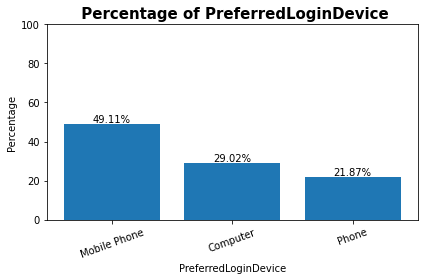

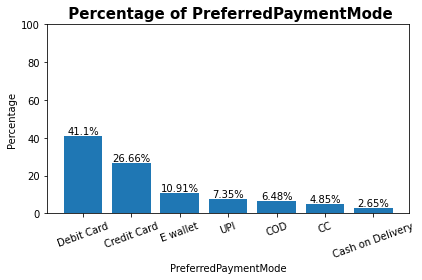

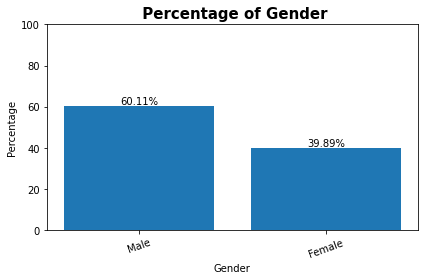

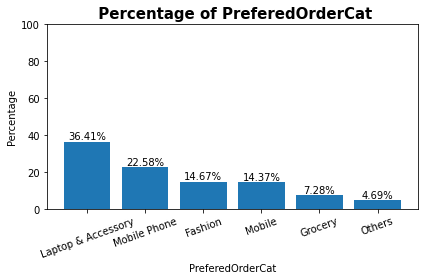

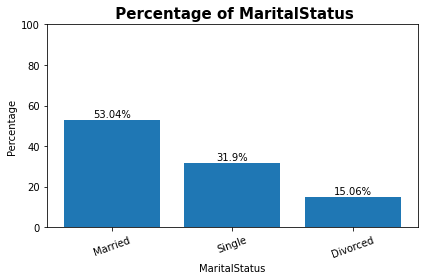

In [14]:
cat_var=df.select_dtypes(exclude = 'number')

# Calculate the percentage of each categorical variable
for column in cat_var:
    counts = df[column].value_counts()
    percent = round((counts / len(df)) * 100,2)
    
# Create the bar plot
    fig, ax = plt.subplots()
    ax.bar(counts.index, percent)
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.set_title(f" Percentage of {column}", fontweight='bold', fontsize=15)

# Add the percentage labels to the bars
    for i in range(len(percent)):
        value = round(percent[i], 2)
        label = f'{value}%'
        plt.text(i, percent[i], label, ha='center', va='bottom')
        plt.xticks(rotation=20)
    
# Show the plot
    plt.tight_layout()
    plt.show()

In [15]:
df_joinduplicate=df.copy()
#menggabungkan phone ke mobile phone pada kolom PreferredLoginDevice
#menggabungkan COD ke cash on delivery pada kolom PreferredPaymentMode
#menggabungkan CC ke credit card pada kolom PreferredPaymentMode
#menggabungkan mobile ke Mobilephone card pada kolom PreferedOrderCat
df_joinduplicate['PreferredLoginDevice'] = df_joinduplicate['PreferredLoginDevice'].replace("Phone", "Mobile Phone")
df_joinduplicate['PreferredPaymentMode'] = df_joinduplicate['PreferredPaymentMode'].replace("COD", "Cash on Delivery")
df_joinduplicate['PreferredPaymentMode'] = df_joinduplicate['PreferredPaymentMode'].replace("CC", "Credit Card")
df_joinduplicate['PreferedOrderCat'] = df_joinduplicate['PreferedOrderCat'].replace("Mobile", "Mobile Phone")
df_joinduplicate.sample(4)


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
21         50022      1    20.0         Mobile Phone         1   
3584       53585      0    28.0         Mobile Phone         1   
4603       54604      1     1.0             Computer         1   
2490       52491      0     9.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
21               29.0          Credit Card  Female             3.0   
3584             10.0           Debit Card    Male             3.0   
4603             11.0     Cash on Delivery    Male             4.0   
2490             18.0           Debit Card  Female             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
21                           3             Fashion                  2   
3584                         4             Grocery                  2   
4603                         5        Mobile Phone                  3   
2490                         3  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
21        Divorced                2         0                         12.0   
3584      Divorced                5         0                          NaN   
4603        Single                7         0                         17.0   
2490       Married               10         1                         12.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
21          11.0        15.0                6.0          203.12  
3584         2.0         2.0               10.0          302.79  
4603         1.0         2.0                3.0          163.94  
2490         0.0         1.0                1.0          146.63

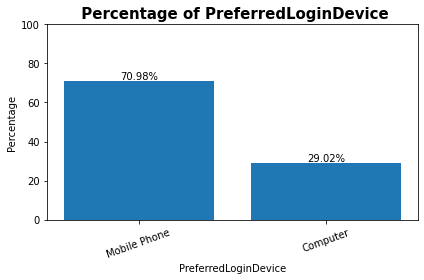

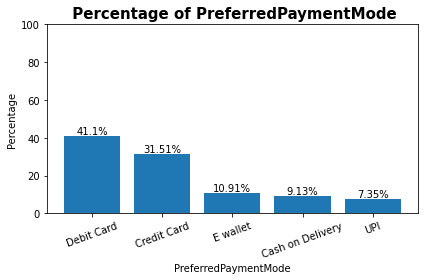

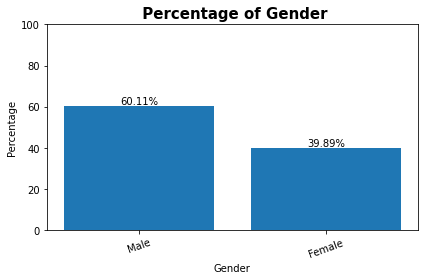

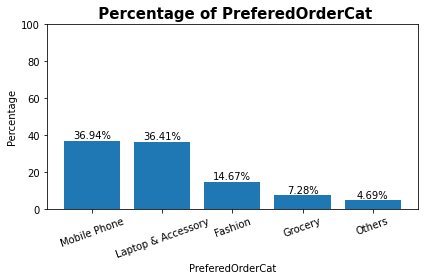

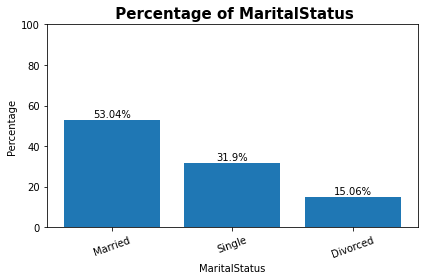

In [16]:
cat_var=df_joinduplicate.select_dtypes(exclude = 'number')

# Calculate the percentage of each categorical variable
for column in cat_var:
    counts = df_joinduplicate[column].value_counts()
    percent = round((counts / len(df_joinduplicate)) * 100,2)
    
# Create the bar plot
    fig, ax = plt.subplots()
    ax.bar(counts.index, percent)
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.set_title(f" Percentage of {column}", fontweight='bold', fontsize=15)

# Add the percentage labels to the bars
    for i in range(len(percent)):
        value = round(percent[i], 2)
        label = f'{value}%'
        plt.text(i, percent[i], label, ha='center', va='bottom')
        plt.xticks(rotation=20)
    
# Show the plot
    plt.tight_layout()
    plt.show()

*Interpretasi* :
Plot diatas persentase dari banyak data disetiap variable di masing masing features categorical

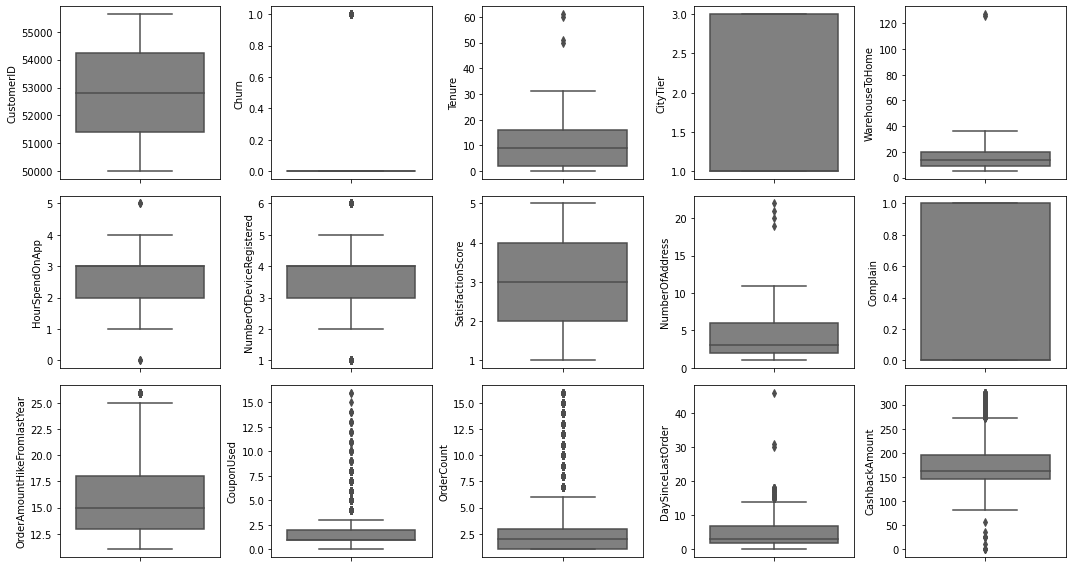

In [17]:
features = df_num.columns
fig = plt.subplots(figsize=(15,8))
for i in range(0, len(features)):
    plt.subplot(3, int(len(features)/3), i+1)
    sns.boxplot(y=df[features[i]],color='grey', orient='v')
plt.tight_layout()
plt.show()

<li>Citytier -> categorical</li>
<li>Complain -> categorical</li>
<li>Churn -> categorical</li><br>
Berapa banyak dan berapa jauh outlier di setiap kolom?
<li> HourSpendingOnApp dan NumberOfDeliveryRegistered memiliki outlier pada nilai min dan max</li>
<li> Pada WarehouseToHome ada pencilan dengan jarak yang jauh</li>
<li> CashbackAmount memiliki banyak pencilan</li>
<li>CouponUsed dan OrderCount juga memiliki banyak pencilan</li>

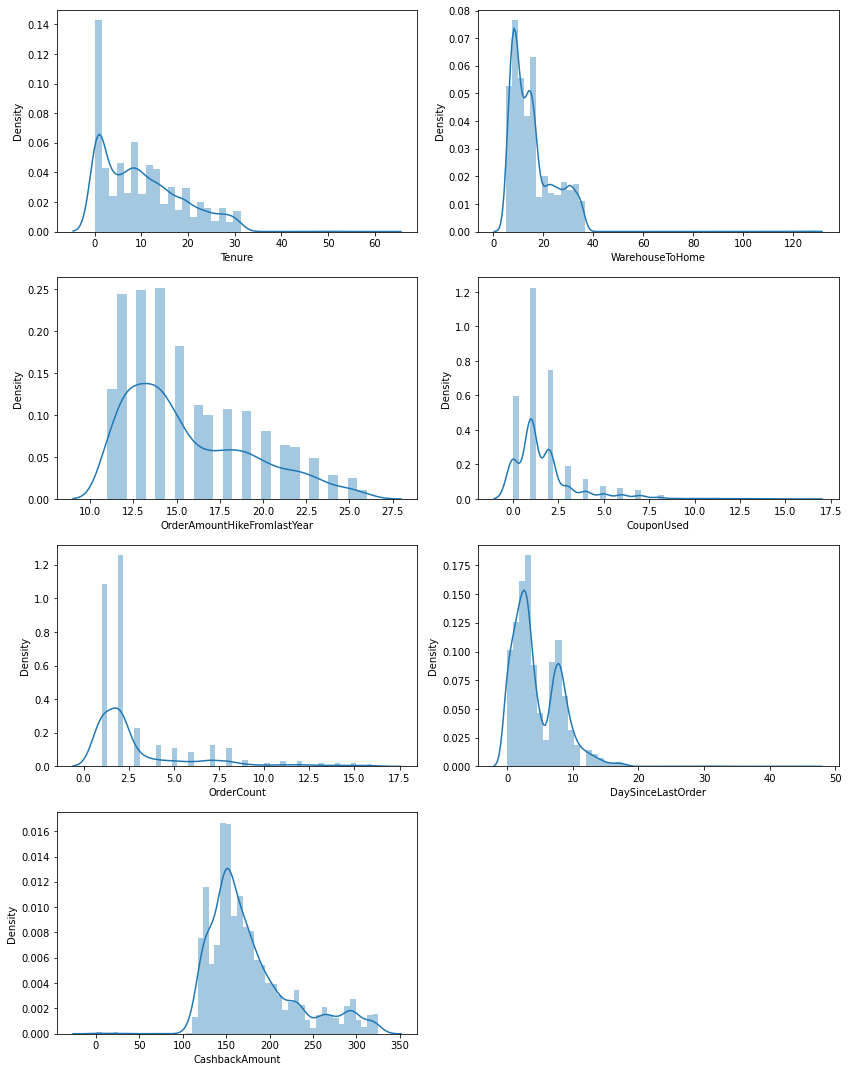

In [18]:
#individual displot for tenure, warehousetohome, OrderAmountHikeFromlastYear, couponused, ordercount,
#daysincelastorder, cashbackamount
col = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount',
       'DaySinceLastOrder','CashbackAmount']
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(col)):
    plt.subplot(4, int(len(col)/3), i+1)
    sns.distplot(df[col[i]])
plt.tight_layout()
plt.show()

<ul>Individual Displot
<li>bagaimana bentuk distribusi setiap kolom?</li>
<li>apakah ada nilai-nilai tertentu yang umum?</li>
</ul>

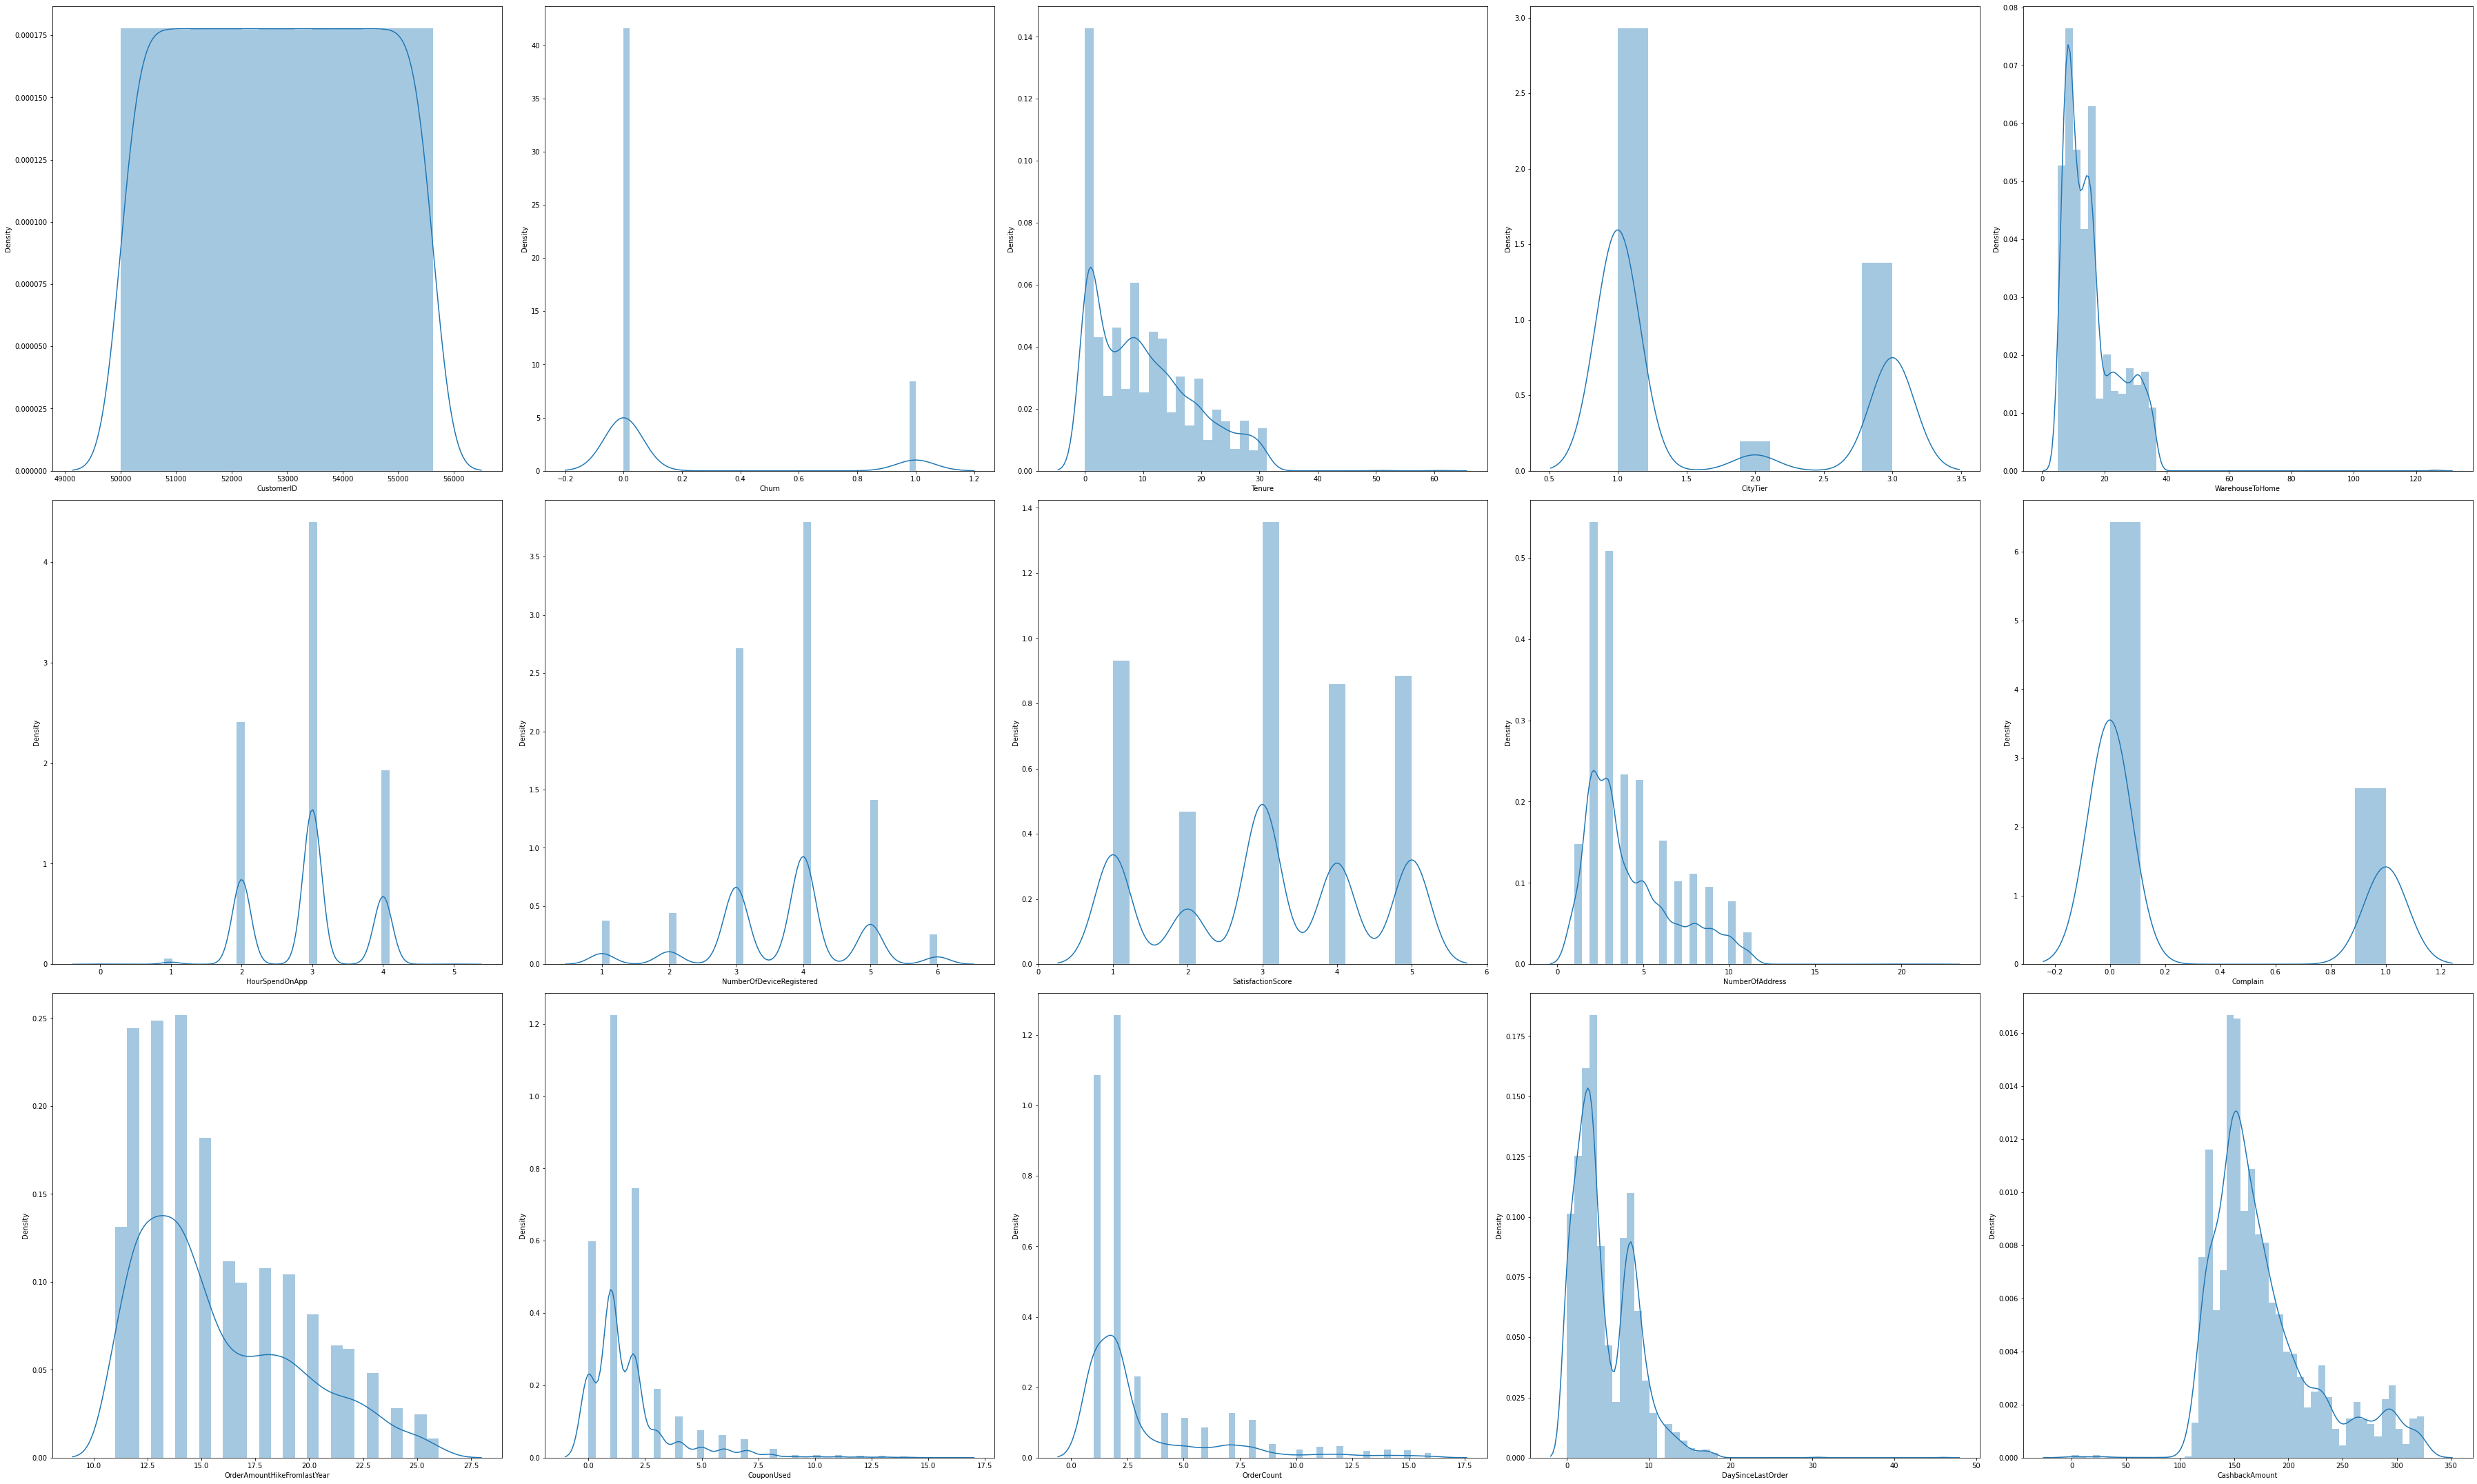

In [19]:
num_var = df_num.columns
fig = plt.subplots(figsize=(50,30))
for i in range(0, len(num_var)):
    plt.subplot(3, int(len(num_var)/3), i+1)
    sns.distplot(df[num_var[i]])
plt.tight_layout()
plt.show()

Interpretasi :
Grafik diatas adalah distribusi setiap features.

Skew positif ▶ Tenure, WarehouseToHome ,NumberOfAddress, OrderAmountHikeFromlastYear,
       CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount

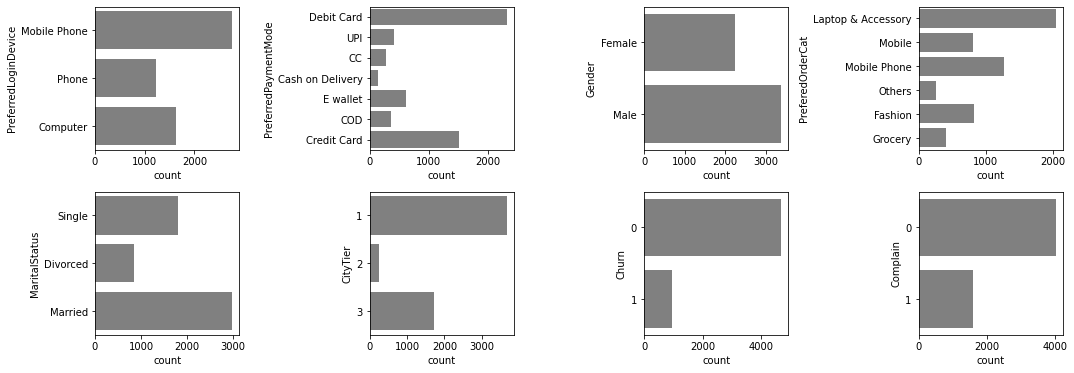

In [20]:
#countplot for categorical
categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
               'PreferedOrderCat', 'MaritalStatus','CityTier','Churn','Complain']
fig = plt.subplots(figsize=(15,10))
for i in range (0,len(categorical)):
    plt.subplot(4,int(len(categorical)/2),i+1)
    sns.countplot(y=df[categorical[i]],color='gray',orient='v')
plt.tight_layout()

<ul>Individual countplot
<li>ketimpangan antar kategori, terutama pada target</li> sebaran kategori yang timpang merupakan indikasi ketidakgunaan feature. Di Target kalau timpang bisa buat <i>learning</i> gagal.
<li> Terlihat jika sebaran Churn lumayan timpang</li>
</ul>


### Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel

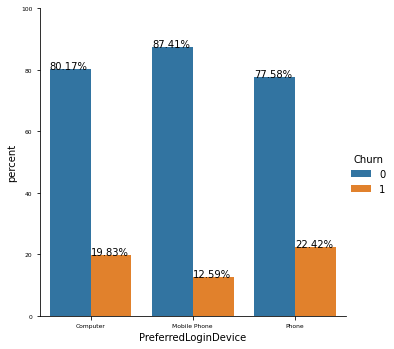

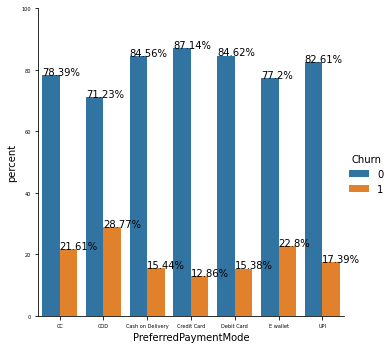

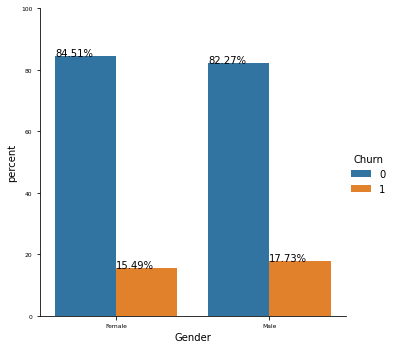

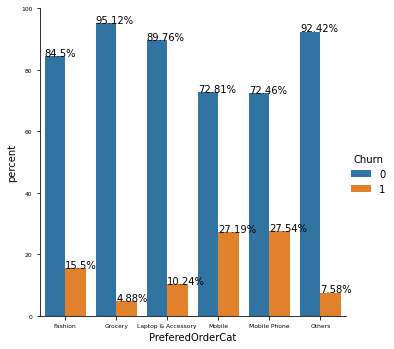

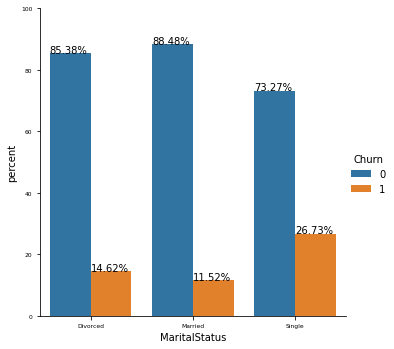

In [21]:
# sebelum duplikat
x, y = 'PreferredLoginDevice', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

x, y = 'PreferredPaymentMode', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 5)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'Gender', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'PreferedOrderCat', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'MaritalStatus', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

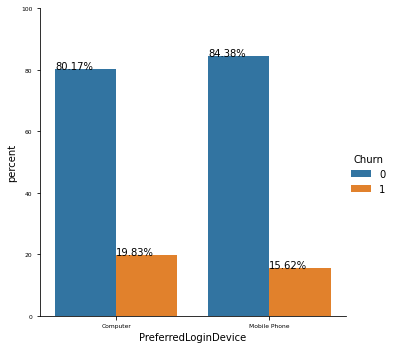

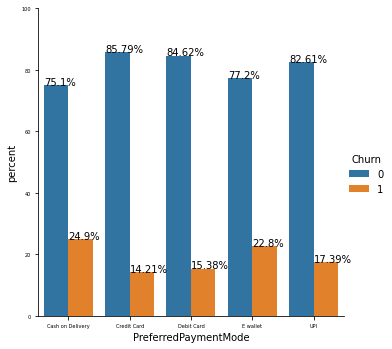

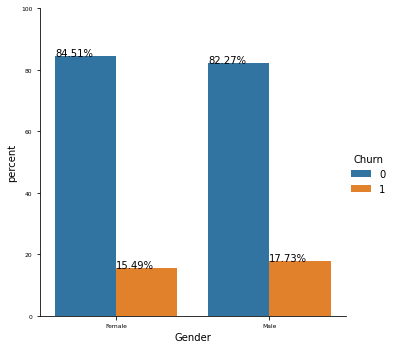

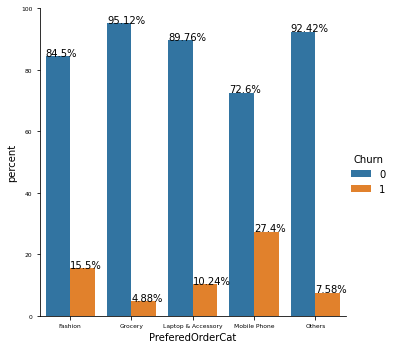

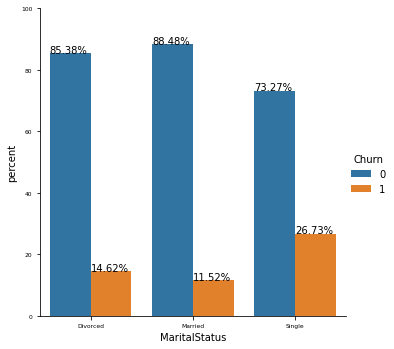

In [22]:
# setelah duplikat
x, y = 'PreferredLoginDevice', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

x, y = 'PreferredPaymentMode', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 5)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'Gender', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'PreferedOrderCat', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
x, y = 'MaritalStatus', 'Churn'

df1 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

Interpretasi:
Dari grafik diatas dapat dilihat keterhubungan antara data categorical terhadap target.
Secara keseluruhan dari setiap grafik data categorical memiliki tingkat tidak churn yang lebih tinggi dari pada yang churn

1. PreferredLoginDevice : jumlah tingkat churn setiap kategori sama sama dibawah 500

2. PreferredPaymentMode : Debit card memiliki tingkat churn yang lebih tinggi diantara 7 kategori

3. Gender : memiliki jumlah tingkat churn yang tidak selisih jauh

4. PreferedOrderCat : Mobile Phone memiliki jumlah tingkat churn yang paling tinggi diantara 6 kategori

5. MaritalStatus : divorced adalah kategori dengan jumlah churn paling rendah diantara 3 kategori

*   Pada feature PreferredLoginDevice, ada 2 data yang bisa digabungkan yaitu mobile phone dan phone. Alasan dilakukan penggabungan dikarenakan e-commerce tidak bisa diakses melalui telepon rumah / landline. Sehingga perlu dilakukan agar tidak terjadi duplikasi. Setelah dilakukan penggabungan, perbandingan churn antara login computer dan mobile phone dapat dibedakan yaitu lebih tinggi persentase yang churn dengan menggunakan computer.
*   Pada feature PreferredPaymentMethod, ada 2 data yang bisa digabungkan yaitu credit card dengan cc dan cash on delivery dengan cod.. Alasan dilakukan penggabungan dikarenakan metode pembayaran CC adalah singkatan dari Credit Card, dan COD adalah cash on delivery, sehingga perlu dilakukan agar tidak terjadi duplikasi. Setelah dilakukan penggabungan, perbandingan churn antara masing-masing payment method dapat dibedakan, dan persentase churn tertinggi adalah dengan metode pembayaran cash on delivery.
*   Pada preferred order category juga dilakukan penggabungan pada mobile phone dengan mobile. Diperoleh persentase churn tertinggi pada preferred order mobile phone.

Insight:

Berdasarkan analisis data bivariate, preferred login device, payment method, preferred order dan marital status dapat menjadi faktor kemungkinan penyebab churn, sedangkan untuk gender, persentase churnnya tidak berbeda terlalu jauh. 


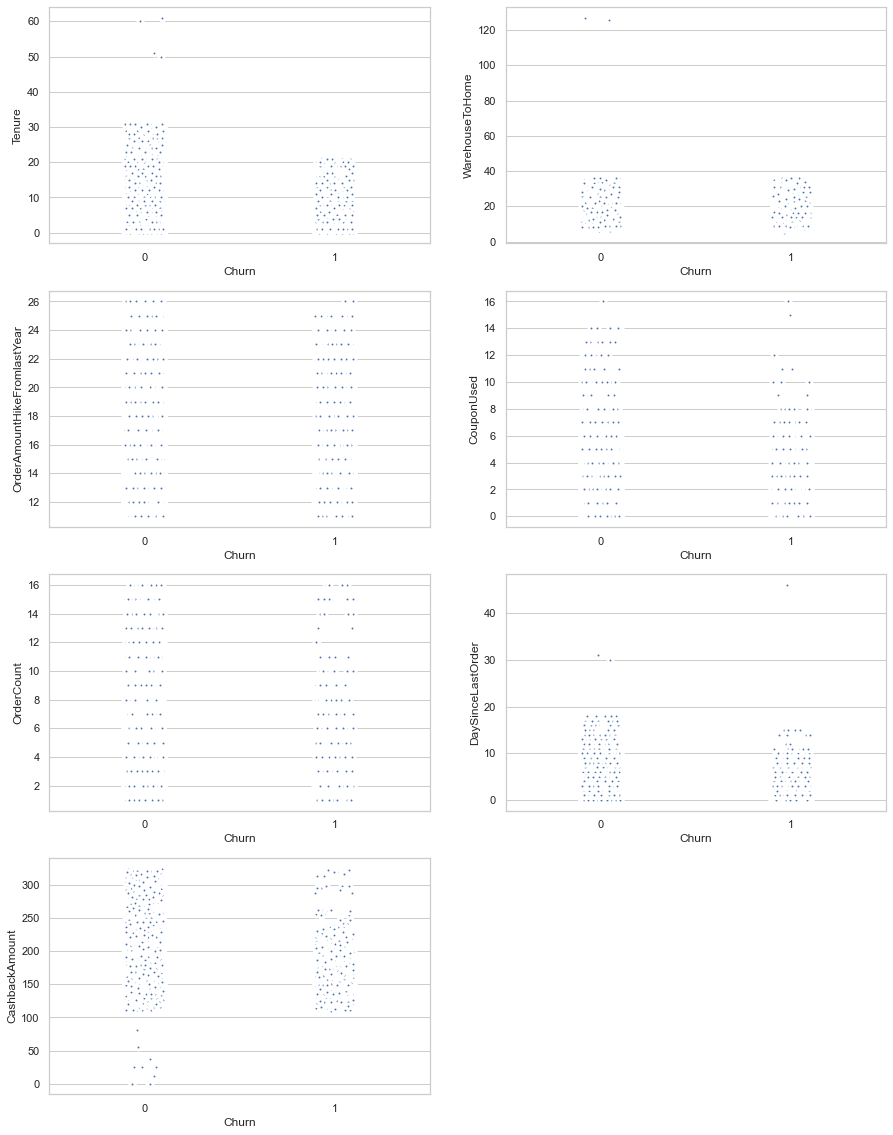

In [23]:
#Data numerical

num = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount',
       'DaySinceLastOrder','CashbackAmount']
fig = plt.subplots(figsize=(15,20))
sns.set(style = 'whitegrid')
for i in range(0, len(num)):
    plt.subplot(4, int(len(num)/3), i+1)
    sns.stripplot(y=df[num[i]], x="Churn", data=df,
                   linewidth=3, edgecolor='white')

Interpretasi :

*   Customer yang churn terdistribusi pada CashbackAmount di atas median nya, dengan kata lain customer yang menerima cashbackamount banyak pun tetap churn
*   Pada warehousetohome, customer yg jarak antara rumah dan warehouse nya paling jauh tidak churn

*   Pada Couponused, customer yang menggunakan coupon paling banyak juga churn








Produt Category dengan Complain

In [24]:
df_joinduplicate=df.copy()
df_joinduplicate['PreferedOrderCat'] = df_joinduplicate['PreferedOrderCat'].replace("Mobile", "Mobile Phone")

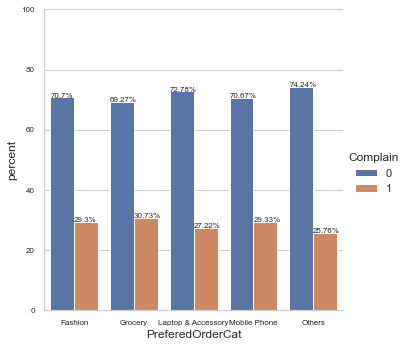

In [25]:
x, y = 'PreferedOrderCat', 'Complain'

df2 = df_joinduplicate.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df2)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Category grocery adalah category dengan presentase customer yg churn nya paling tinggi

Order Count - Hours Spend on App

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

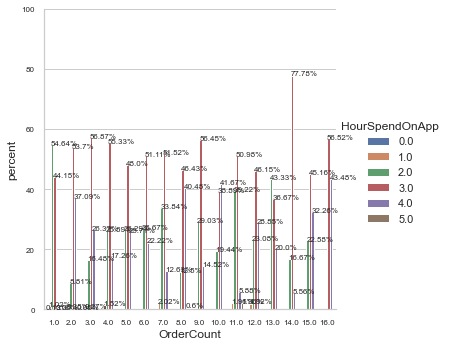

In [26]:
x, y = 'OrderCount', 'HourSpendOnApp'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Pada setiap jumlah order count, hoursspendonapp paling tinggi adalah 3 jam

Order Count - Churn

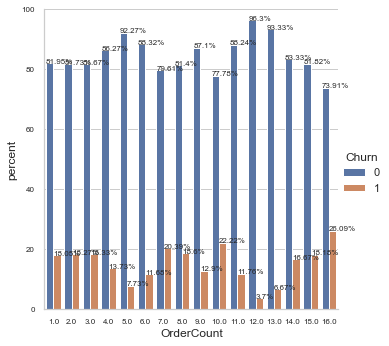

In [27]:
x, y = 'OrderCount', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Order count paling banyak (16), presentase churn nya juga paling tinggi (26,09%)

Day Since Last Order - Churn

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


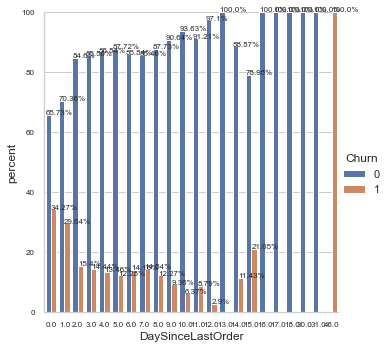

In [28]:
x, y = 'DaySinceLastOrder', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Presentase churn paling tinggi adalah pada customer yang daysincelast ordernya jg paling lama, lalu di urutan kedua adalah customer yang daysincelast order nya justru paling sebentar di 0-2 hari

City Tier - Churn

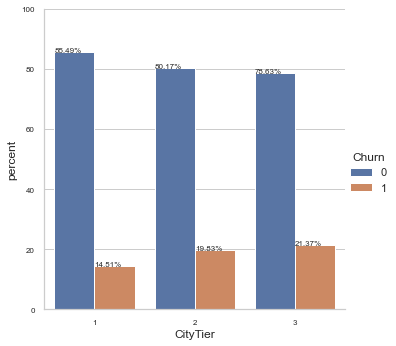

In [29]:
x, y = 'CityTier', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

City tier paling jauh (kategori 3) memiliki tingkat churn yang paling tinggi

Satisfaction Score - Churn

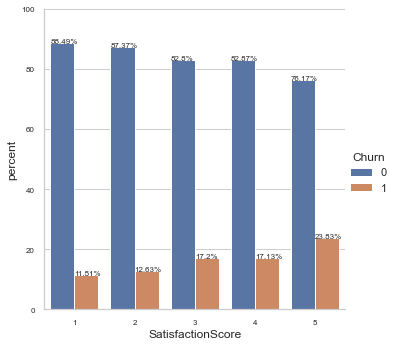

In [30]:
x, y = 'SatisfactionScore', 'Churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

Satisfaction score 5 memiliki tingkat churn yang paling tinggi

Customer who Repeat Order

In [31]:
df4 = df.groupby('CustomerID').agg({'PreferedOrderCat':'unique'})
print(df4)

                PreferedOrderCat
CustomerID                      
50001       [Laptop & Accessory]
50002                   [Mobile]
50003                   [Mobile]
50004       [Laptop & Accessory]
50005                   [Mobile]
...                          ...
55626       [Laptop & Accessory]
55627                  [Fashion]
55628       [Laptop & Accessory]
55629       [Laptop & Accessory]
55630       [Laptop & Accessory]

[5630 rows x 1 columns]


In [32]:
df[df['CustomerID'].duplicated(keep=False)==True]

Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [33]:
df['CustomerID'].duplicated().sum()

0

Dengan tidak adanya duplicate di data customer ID dapat disimpulkan tidak ada customer yang melakukan repeat order dalam tabel ini

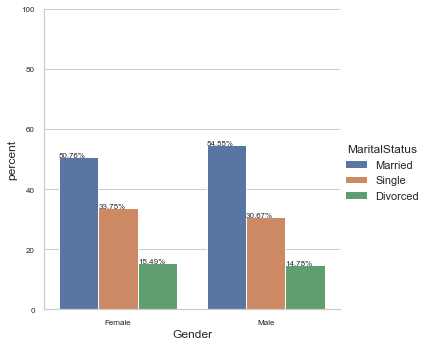

In [34]:
x, y = 'Gender', 'MaritalStatus'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 8)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize=8);

### Multivariate Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel

In [35]:
#heatmap (numerical variable)
df_heatmap=df_num.corr()
df_heatmap

CustomerID     Churn    Tenure  CityTier  \
CustomerID                     1.000000 -0.019083  0.029952  0.003239   
Churn                         -0.019083  1.000000 -0.349408  0.084703   
Tenure                         0.029952 -0.349408  1.000000 -0.060688   
CityTier                       0.003239  0.084703 -0.060688  1.000000   
WarehouseToHome                0.058909  0.076630 -0.018218  0.010624   
HourSpendOnApp                 0.598417  0.018675 -0.021226 -0.009150   
NumberOfDeviceRegistered       0.411098  0.107939 -0.023983  0.027934   
SatisfactionScore             -0.033146  0.105481 -0.013903 -0.011554   
NumberOfAddress                0.160814  0.043931  0.237666 -0.029440   
Complain                      -0.009944  0.250188 -0.021268  0.003375   
OrderAmountHikeFromlastYear    0.117243 -0.010058  0.005825 -0.031408   
CouponUsed                     0.234302 -0.008264  0.129035  0.021456   
OrderCount                     0.139008 -0.028697  0.186403  0.033388   
DaySinceLastOrder              0.113243 -0.160757  0.184552  0.017525   
CashbackAmount                 0.217129 -0.154118  0.476380  0.055746   

                             WarehouseToHome  HourSpendOnApp  \
CustomerID                          0.058909        0.598417   
Churn                               0.076630        0.018675   
Tenure                             -0.018218       -0.021226   
CityTier                            0.010624       -0.009150   
WarehouseToHome                     1.000000        0.060990   
HourSpendOnApp                      0.060990        1.000000   
NumberOfDeviceRegistered            0.019071        0.316800   
SatisfactionScore                   0.007722        0.031858   
NumberOfAddress                    -0.011020        0.145126   
Complain                            0.028696        0.006976   
OrderAmountHikeFromlastYear         0.038795        0.106843   
CouponUsed                         -0.003935        0.191528   
OrderCount                          0.002681        0.109575   
DaySinceLastOrder                   0.017829        0.075716   
CashbackAmount                     -0.009200        0.121490   

                             NumberOfDeviceRegistered  SatisfactionScore  \
CustomerID                                   0.411098          -0.033146   
Churn                                        0.107939           0.105481   
Tenure                                      -0.023983          -0.013903   
CityTier                                     0.027934          -0.011554   
WarehouseToHome                              0.019071           0.007722   
HourSpendOnApp                               0.316800           0.031858   
NumberOfDeviceRegistered                     1.000000          -0.017228   
SatisfactionScore                           -0.017228           1.000000   
NumberOfAddress                              0.084997           0.053583   
Complain                                     0.003407          -0.031115   
OrderAmountHikeFromlastYear                  0.069475          -0.027730   
CouponUsed                                   0.151685           0.017936   
OrderCount                                   0.103464           0.019764   
DaySinceLastOrder                            0.018208           0.032082   
CashbackAmount                               0.137183           0.003473   

                             NumberOfAddress  Complain  \
CustomerID                          0.160814 -0.009944   
Churn                               0.043931  0.250188   
Tenure                              0.237666 -0.021268   
CityTier                           -0.029440  0.003375   
WarehouseToHome                    -0.011020  0.028696   
HourSpendOnApp                      0.145126  0.006976   
NumberOfDeviceRegistered            0.084997  0.003407   
SatisfactionScore                   0.053583 -0.031115   
NumberOfAddress                     1.000000 -0.026399   
Complain                           -0.

Text(0.5, 1.0, 'Correlation Feature')

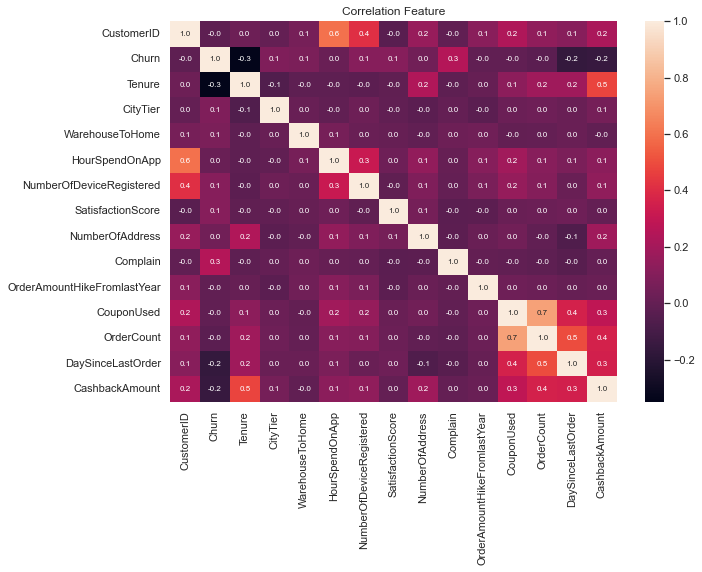

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(df_heatmap, annot=True, fmt="0.1f", annot_kws={"fontsize":8})
plt.title('Correlation Feature')

Interpretasi :
Heatmap diatas menggambarkan nilai korelasi antar variabel. Dapat dilihat dari tingkat kepekatan warna, semakin terang maka korelasi semakin tinggi. kalo semakin gelap maka korelasi semakin rendah. 

Atau bisa juga korelasi dikatakan sangat kuat jika nilainya melebihi 0.7 jika kurang dari tersebut korelasi antar dua variabel tersebut lemah.

Hanya korelasi antara variabel OrderAccount dan CouponUsed yang mendapat nilai 0.7

<ul>
<li>Apakah feature memiliki korelasi dengan target?</li> feature yang memiliki nilai korelasi paling tinggi dengan target adalah Complain, dengan nilai 0.3

❓ kalau misal ada yang tidak berkolerasi dengan target solusinya apa?
<li>Apakah ada 2 feature yang berkolerasi kuat (>0.7)?</li>Tidak ada yang diatas 0.7, tetapi feature OrderAccount dan CouponUsed mendapat nilai 0.7

<Axes: xlabel='Tenure', ylabel='CashbackAmount'>

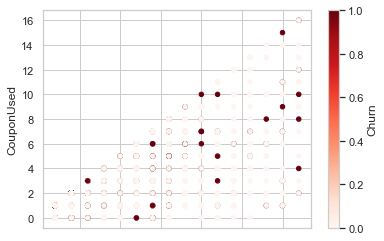

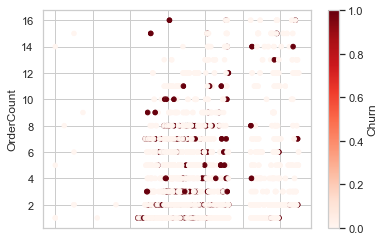

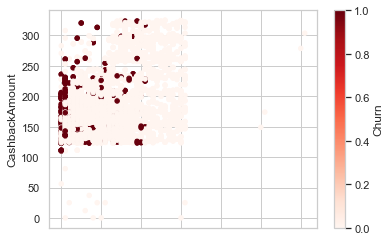

In [37]:
#scatterplot 3 features berdasarkan nilai korelasi pada heatmap
df.plot.scatter(x='OrderCount',y='CouponUsed',c='Churn',cmap='Reds') #0.7
df.plot.scatter(x='CashbackAmount',y='OrderCount',c='Churn',cmap='Reds') #0.4
df.plot.scatter(x='Tenure',y='CashbackAmount',c='Churn',cmap='Reds') #0.5

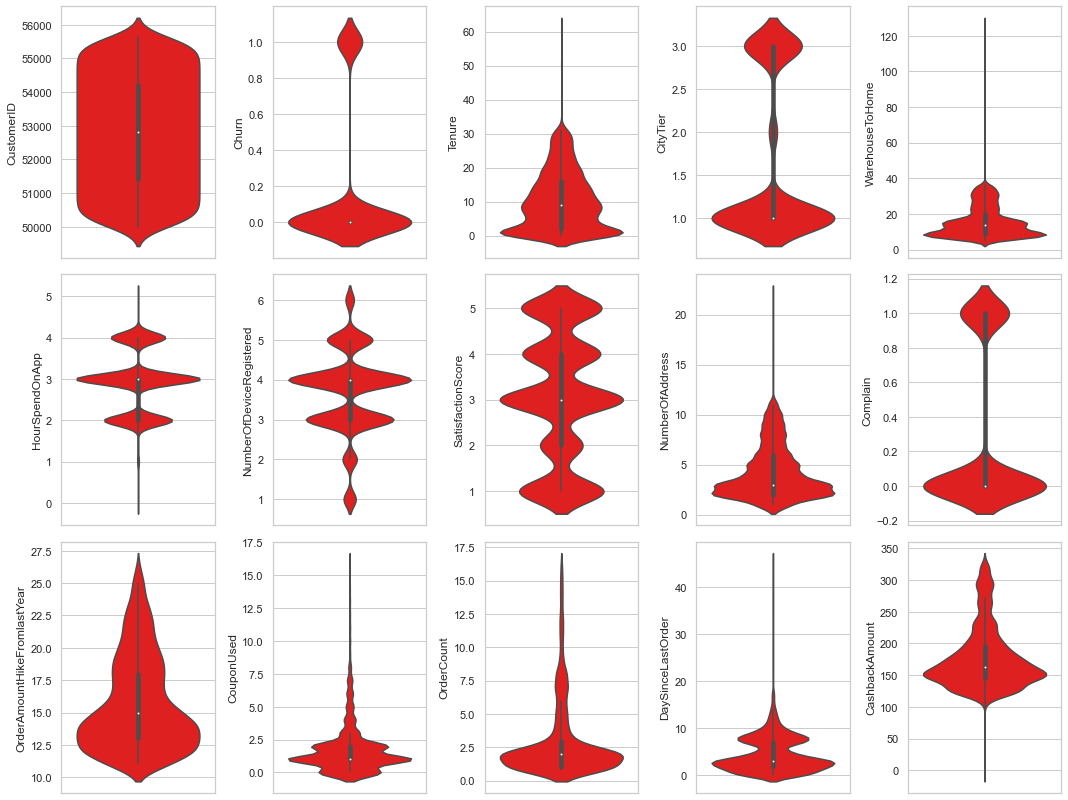

In [38]:
#Violinplot : representation of the distribution.
var=df_num.columns

fig = plt.subplots(figsize=(15,15))
for i in range(0, len(var)):
    plt.subplot(4, int(len(var)/3), i+1)
    sns.violinplot(y=df[var[i]], color='red')
plt.tight_layout()
plt.show()

Interpretasi :
violin plot merupakan gabungan antara bloxplot dan distribution plot

plot diatas adalah violinplot untuk variable numerical

dilihat dari distribusi : 
1. Churn : banyak yang tidak churn 
2. Tenure : kebanyakan ada di 0
3. CityTier : class 1 lebih banyak
4. WarehouseToHome : kebanyakan ada di range 10
5. HourSpendOnApp : lebih banyak di class 3
6. NumberOfDeviceRegistered : lebih banyak di class 4
7. SatisfactionScore : lebih banyak di class 3
8. NumberOfAddress : kebanyakan ada di range 2 atau 3
9. Complain : yg tidak complain lebih banyak
10. OrderAmountHikeFromlastYear : dominasi lebih banyak di range 12.5-15
11. CouponUsed : kebanyakan ada di sekitar 1.5
12. OrderCount : dominasi lebih banyak di range 2-2.5
13. DaySinceLastOrder : lebih banyak di range sekitar 3-4
14. CashbackAmount : dominasi lebih banyak di sekitar 150


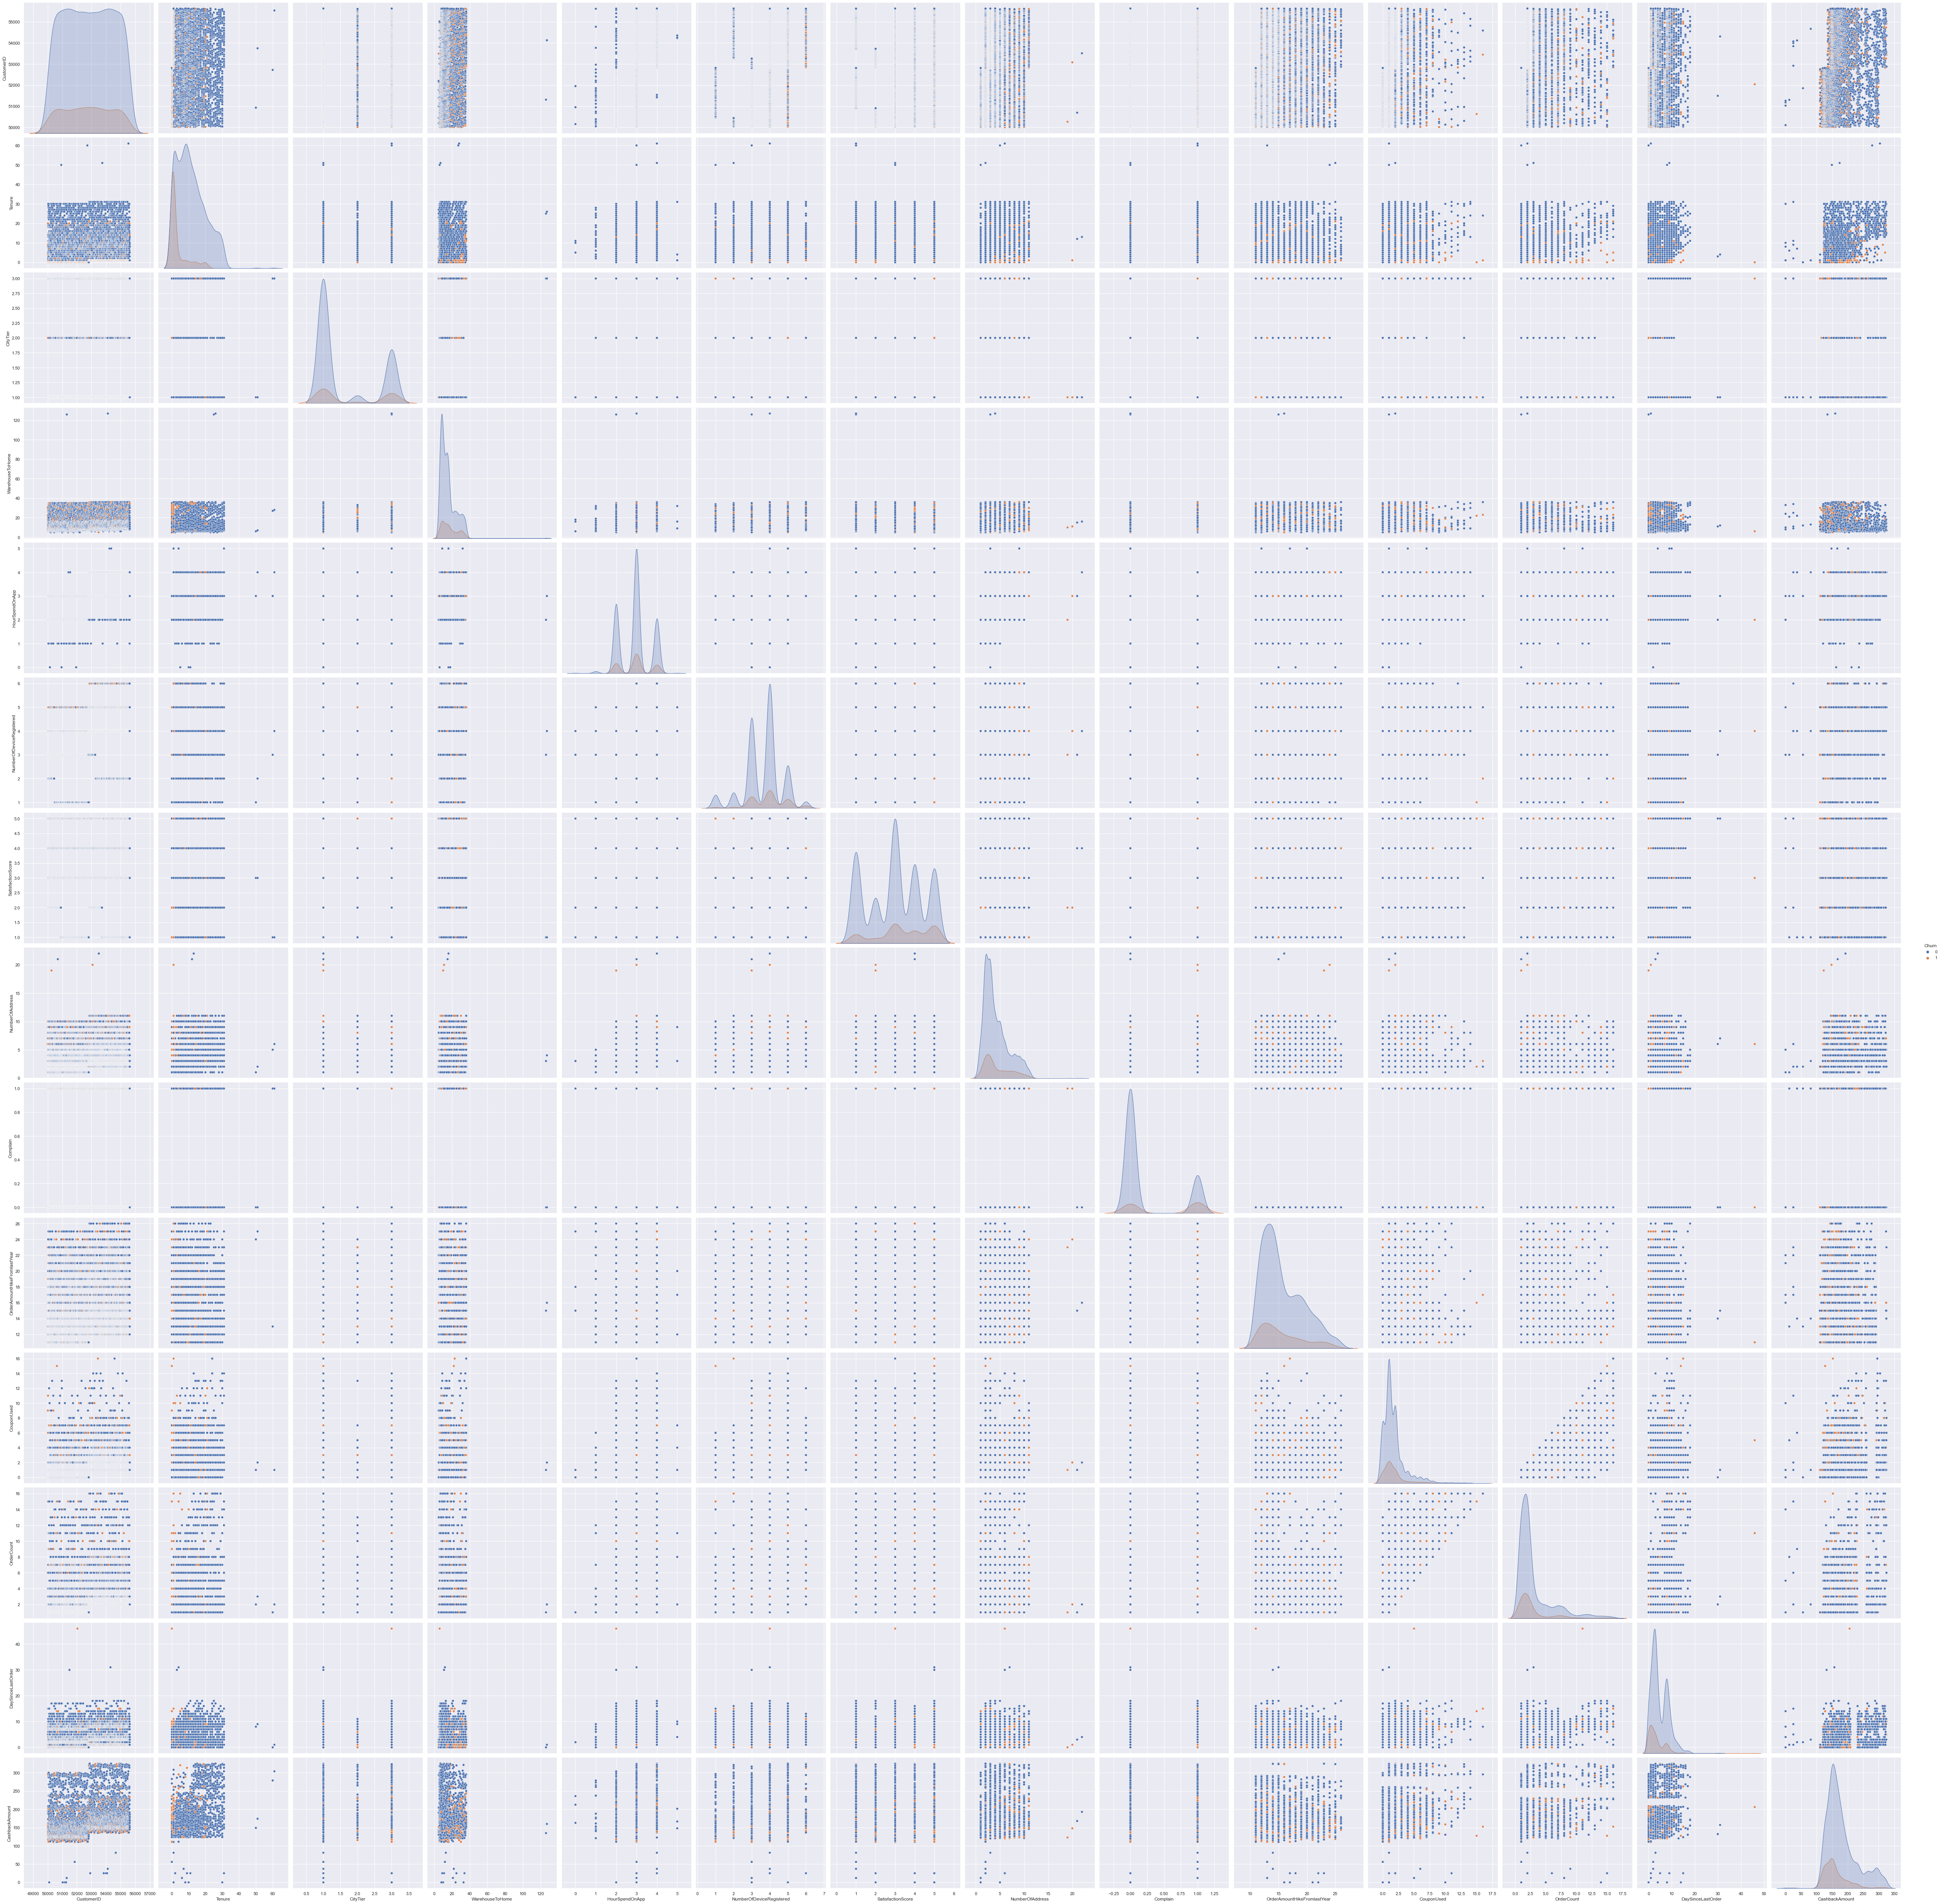

In [39]:
sns.set()
cols=df.columns
sns.pairplot(df[cols],hue='Churn', size=5)
plt.show()

Interpretasi :
Grafik diatas adalah multiple scatterplot antara banyak variable. 

⏺ Positif linear terlihat jelas  antara variabel OrderAccount dan CouponUsed yang mana jika nilai y naik begitupula dengan nilai x

<ul>Memasangkan feature numerik dan kategorikal
<li>Apakah feature categorical memiliki kolerasi dengan target?</li>
<li>Apakah ada 2 feature categorical yang terlihat jelas berkolerasi</li>

### Hypothesis Testing

In [40]:
#membuat dataset copy
ht = df.copy()
ht.head(2)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90

In [41]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### Hyphotesis Testing 1 - Complain

<ul>Hypothesis Testing to Complain
  <li>H0 : Complain not have a significant relationship with Churn</li>
  <li>H1 : Complain have a significant relationship with Churn</li>
</ul>
<i> Level of significance : 5%</i>

In [42]:
def complain (x):
    if x == 1:
        return 'Complained'
    else:   
        return 'No Complain'

In [43]:
def churn (x):
    if x == 1:
        return 'Churn'
    else:
        return 'Not Churn'

In [44]:
ht['Complain'] = ht['Complain'].apply(complain)
ht['Complain'].value_counts()

No Complain    4026
Complained     1604
Name: Complain, dtype: int64

In [45]:
ht['Churn'] = ht['Churn'].apply(churn)
ht['Churn'].value_counts()

Not Churn    4682
Churn         948
Name: Churn, dtype: int64

In [46]:
ht_group = ht.groupby(['Complain','Churn']).agg(user_count=('CustomerID','count')).reset_index()
ht_group

Complain      Churn  user_count
0   Complained      Churn         508
1   Complained  Not Churn        1096
2  No Complain      Churn         440
3  No Complain  Not Churn        3586

In [47]:
ht_group2 = ht.groupby(['Complain']).agg(total_user=('CustomerID','count')).reset_index()
ht_group2

Complain  total_user
0   Complained        1604
1  No Complain        4026

In [48]:
group_ratio = ht_group.merge(ht_group2,on='Complain')
group_ratio['Ratio'] = round(group_ratio['user_count']/group_ratio['total_user']*100,2)
group_ratio

Complain      Churn  user_count  total_user  Ratio
0   Complained      Churn         508        1604  31.67
1   Complained  Not Churn        1096        1604  68.33
2  No Complain      Churn         440        4026  10.93
3  No Complain  Not Churn        3586        4026  89.07

[Text(0, 0, '68.33'), Text(0, 0, '89.07')]

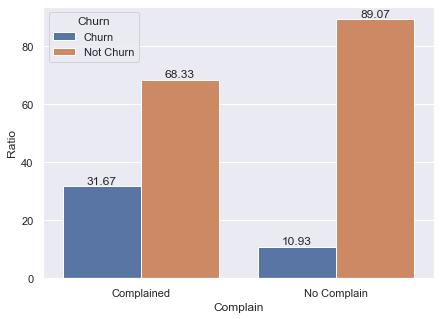

In [49]:
f,ax = plt.subplots(figsize=(7,5))
sns.barplot(data=group_ratio,
            x='Complain',
            y='Ratio',
            hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

##### <b> Chi-Squared Test </b><br>
Because the two variables are categorical.
<ul>
<li>Independence test<br><p align = 'justify'>
The test for independence might be used to asses the association between categorical variables. A chi-squared test for independence might indicate how probable it is that any observed divergence between the actual frequancies in the data and these theoretical predictions can be explained by random chance.</p></li>


Reference : <a href = 'https://analyticsindiamag.com/how-to-use-the-chi-square-test-for-two-categorical-variables/'>How to use the Chi-Squared Test for two categorical variables?</a>

In [50]:
contingency_table = pd.crosstab(df['Churn'],df['Complain'], margins=True)
print('Contingency table :\n', contingency_table)

Contingency table :
 Complain     0     1   All
Churn                     
0         3586  1096  4682
1          440   508   948
All       4026  1604  5630


<p align = 'justify'>A contingency table <i>(cross-tabulation or crosstab)</i> is type of table used in statistics to display the relationship between two categorical variables. The table is organized such that each row represents a different category of one variable, and each column represents a different category of the other variable. The intersection of a row and column contains the frequency or count of the cases that belong to both categories.</p>

In [51]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  352.41
p Value:
0.0
Degree of Freedom:      4
Expected Frequencies:
 [[3348.08738899 1333.91261101 4682.        ]
 [ 677.91261101  270.08738899  948.        ]
 [4026.         1604.         5630.        ]]


The critical value for the chi-squared test with a degree of freedom of 4 and alpha 0.05 is 9.488. Since the test statistic (352.41) exceeds the critical value, the null hyphotesis is rejected.

<ul>
<li>Goodness of Fit<br><p align = 'justify'>
Determine how well a theoretical model fits the observed data. In this test, the observed frequencies are compared to the expected frequencies, which are calculated from the theorretical model. The test determines if the difference between the observed and expected frequencies is significant</p></li>

In [52]:
obs_values = contingency_table.values
print('Observed Values:\n',obs_values)

Observed Values:
 [[3586 1096 4682]
 [ 440  508  948]
 [4026 1604 5630]]


In [53]:
ev = stats.chi2_contingency(contingency_table)
expected_values = ev[3]
print("Expected Values :\n",expected_values)

Expected Values :
 [[3348.08738899 1333.91261101 4682.        ]
 [ 677.91261101  270.08738899  948.        ]
 [4026.         1604.         5630.        ]]


In [54]:
no_of_rows=len(contingency_table.iloc[0:3,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
degree_of=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",degree_of)

Degree of Freedom: 2


In [55]:
chi_square=sum([(o-e)**2./e for o,e in zip(obs_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 352.4051364983911


<p align = 'justify'>The critical value for the chi-square test with a degree of freedom of 2 and alpha 0.05 is 5.991. Since the test statistic (352.40) exceeds the critical value, the null hypothesis is rejected. Therefore, Complain and Churn experience have a significant variation in the distribution. This could be concluded that there is a substantial dependency of Complain on relevant experience according to the data.</p>

<b>Conclusion</b>: Reject the null hypothesis, the sample data provides enough evidence to suggest that the null hypothesis is not true</p>

#### Hyphotesys Testing 2 - Tenure

In [56]:
ht[['Tenure']].describe()

Tenure
count  5366.000000
mean     10.189899
std       8.557241
min       0.000000
25%       2.000000
50%       9.000000
75%      16.000000
max      61.000000

<Axes: xlabel='Tenure', ylabel='CustomerID'>

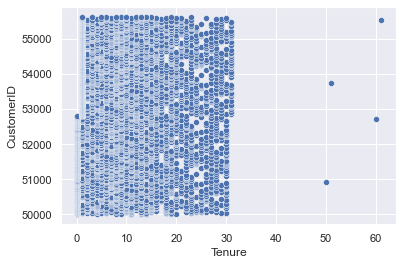

In [57]:
sns.scatterplot(data=ht, x='Tenure', y='CustomerID')

In [58]:
def group(x):
    try:
        if x['Tenure'] <= 2:
            group = 'Low'
        elif x['Tenure'] <= 16:
            group = 'Mid'
        elif x['Tenure'] >16:
            group = 'High'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['tenure_group'] = ht.apply(lambda x: group(x), axis=1)

Karena persebaran data yang sedemikian rupa, saya memutuskan untuk mengkategorikan data sebagai berikut:<br>
- Low : data dengan nilai dibawah Q2, <br>
- Mid : data dengan nilai antara Q2 dan Q3, <br>
- High : data dengan nilai di atas Q3.

In [59]:
def group(x):
    try:
        if x['Tenure'] <= ht['Tenure'].quantile(0.5):
            group = 'Low'
        elif (x['Tenure'] >= ht['Tenure'].quantile(0.5)) & (x['Tenure'] <= ht['Tenure'].quantile(0.75)):
            group = 'Mid'
        elif x['Tenure'] > ht['Tenure'].quantile(0.75):
            group = 'High'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['tenure_group'] = ht.apply(lambda x: group(x), axis=1)

In [60]:
ht.sample(3)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
2395       52396  Not Churn    15.0             Computer         1   
1963       51964  Not Churn     0.0                Phone         1   
3812       53813  Not Churn     3.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
2395             15.0          Credit Card  Female             3.0   
1963              8.0                   CC    Male             3.0   
3812             10.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered  ... SatisfactionScore  MaritalStatus  \
2395                         3  ...                 1         Single   
1963                         1  ...                 5         Single   
3812                         4  ...                 5         Single   

     NumberOfAddress     Complain OrderAmountHikeFromlastYear  CouponUsed  \
2395               2  No Complain                        13.0         0.0   
1963               8  No Complain                        13.0         0.0   
3812               3   Complained                        19.0         1.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  tenure_group  
2395         5.0                8.0          136.73           Mid  
1963         1.0                1.0          134.24           Low  
3812         2.0                6.0          172.23           Low  

[3 rows x 21 columns]

In [61]:
csq_tenure = ht.groupby(['tenure_group','Churn']).size().unstack(fill_value=0)
csq_tenure.columns = ['Churn0','Churn1']
csq_tenure

Churn0  Churn1
tenure_group                
High              48    1183
Low              741    2140
Mid               78    1176

In [62]:
ct1 = stats.chisquare(csq_tenure['Churn1'])
print('Nilai Statistic Tenure :', ct1.statistic, ', dan',
      'PValue Tenure :', ct1.pvalue)

Nilai Statistic Tenure : 410.13425205601243 , dan PValue Tenure : 8.719242295763977e-90


Nilai statistic tenure adalah 1061.9584775086505 lebih besar dari 7.81 sehingga menolak H0 atau ada hubungan antara masing-masing tenure_group terhadap customer yang churn. Begitu juga Pvalue yang lebih kecil dari 0.05 sehingga dapat mendukung pernyataan tersebut.

Reference : https://van-plaosan.medium.com/uji-chi-square-menggunakan-scipy-stats-di-google-colab-7c686c1ce4bf

#### Hyphotesys Testing 3 - DaySinceLastOrder

In [63]:
ht[['DaySinceLastOrder']].describe()

DaySinceLastOrder
count        5323.000000
mean            4.543491
std             3.654433
min             0.000000
25%             2.000000
50%             3.000000
75%             7.000000
max            46.000000

In [64]:
def group(x):
    try:
        if x['DaySinceLastOrder'] <= 2:
            group = 'early'
        elif x['DaySinceLastOrder'] > 7:
            group = 'longtime'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['period'] = ht.apply(lambda x: group(x), axis=1)

Saya mengelompokkan data DaySinceLastOrder menjadi 2 bagian, sehingga saya membaginya menjadi 2 kelompok, sebagai berikut: <br>
- early : data yang bernilai di bawah Q2, <br>
- longtime : data yang bernilai di atas Q2. 

In [65]:
def group(x):
    try:
        if x['DaySinceLastOrder'] <= ht['DaySinceLastOrder'].quantile(0.5):
            group = 'early'
        elif x['DaySinceLastOrder'] > ht['DaySinceLastOrder'].quantile(0.5):
            group = 'longtime'
        else :
            group = None
        return group

    except:
        print['salah input']
ht['period'] = ht.apply(lambda x: group(x), axis=1)

In [66]:
ht.sample(5)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
3504       53505  Not Churn    14.0         Mobile Phone         1   
5548       55549  Not Churn     6.0             Computer         1   
371        50372  Not Churn     0.0                Phone         3   
785        50786  Not Churn     NaN         Mobile Phone         1   
3619       53620  Not Churn     2.0             Computer         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
3504             21.0          Credit Card    Male             3.0   
5548             22.0          Credit Card  Female             3.0   
371              28.0                  COD    Male             2.0   
785               6.0           Debit Card    Male             2.0   
3619              9.0           Debit Card    Male             3.0   

      NumberOfDeviceRegistered  ... MaritalStatus  NumberOfAddress  \
3504                         5  ...        Single                3   
5548                         4  ...       Married                7   
371                          3  ...        Single                2   
785                          3  ...      Divorced                2   
3619                         5  ...      Divorced                3   

         Complain  OrderAmountHikeFromlastYear CouponUsed  OrderCount  \
3504  No Complain                          NaN        5.0         5.0   
5548  No Complain                         19.0        1.0         2.0   
371   No Complain                         11.0        1.0         1.0   
785   No Complain                         22.0        0.0         1.0   
3619   Complained                         13.0        3.0         3.0   

      DaySinceLastOrder  CashbackAmount  tenure_group    period  
3504               10.0          321.26           Mid  longtime  
5548                3.0          191.67           Low     early  
371                 2.0          134.47           Low     early  
785                 1.0          112.23          None     early  
3619                3.0          163.67           Low     early  

[5 rows x 22 columns]

In [67]:
csq_DSLO = ht.groupby(['period','Churn']).size().unstack(fill_value=0)
csq_DSLO.columns = ['Churn0', 'Churn1']
csq_DSLO

Churn0  Churn1
period                  
early        604    2198
longtime     290    2231

In [68]:
cd1 = stats.chisquare(csq_DSLO['Churn1'])
print('Nilai Statistic DaySinceLastOrder  :', cd1.statistic, ', dan',
      'PValue DaySinceLastOrder :', cd1.pvalue)

Nilai Statistic DaySinceLastOrder  : 0.24587943102280424 , dan PValue DaySinceLastOrder : 0.6199915589451542


Nilai statistic tenure adalah 110.28635346756153 lebih besar dari 7.81 sehingga menolak H0 atau ada hubungan antara masing-masing period terhadap customer yang churn. Begitu juga Pvalue yang lebih kecil dari 0.05 sehingga dapat mendukung pernyataan tersebut.

Reference : https://van-plaosan.medium.com/uji-chi-square-menggunakan-scipy-stats-di-google-colab-7c686c1ce4bf

#### Hyphotesys Testing 4 - Satisfaction

Hypothesis Testing to Complain<br>
H0 : Satisfaction score do not have a significant relationship with Churn<br>
H1 : Satisfaction score have a significant relationship with Churn <br>
<i> Level of significance : 5%</i>

In [69]:
ht[['SatisfactionScore']].describe()

SatisfactionScore
count        5630.000000
mean            3.066785
std             1.380194
min             1.000000
25%             2.000000
50%             3.000000
75%             4.000000
max             5.000000

In [70]:
def group(x):
    try:
        if x['SatisfactionScore'] <= 2:
            group = 'Not Satisfy'
        elif x['SatisfactionScore'] <=3:
            group = 'Netral'
        elif x['SatisfactionScore'] >=4:
            group = 'Satisfy'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['Satisfaction_category'] = ht.apply(lambda x: group(x), axis=1)

In [71]:
ht.sample(5)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
3449       53450  Not Churn    19.0                Phone         2   
77         50078  Not Churn     7.0             Computer         1   
4817       54818  Not Churn     3.0         Mobile Phone         1   
572        50573  Not Churn     NaN             Computer         3   
4743       54744  Not Churn     8.0         Mobile Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
3449             31.0          Credit Card    Male             3.0   
77               16.0          Credit Card    Male             2.0   
4817             14.0          Credit Card  Female             4.0   
572              26.0     Cash on Delivery  Female             2.0   
4743             15.0           Debit Card  Female             4.0   

      NumberOfDeviceRegistered  ... NumberOfAddress     Complain  \
3449                         4  ...               3  No Complain   
77                           3  ...               2   Complained   
4817                         5  ...               8  No Complain   
572                          3  ...               2  No Complain   
4743                         4  ...               7  No Complain   

     OrderAmountHikeFromlastYear  CouponUsed OrderCount  DaySinceLastOrder  \
3449                        17.0         1.0        2.0                5.0   
77                          17.0         2.0        2.0                0.0   
4817                        15.0         2.0        2.0                4.0   
572                         15.0         0.0        1.0                2.0   
4743                        18.0         2.0        2.0                3.0   

      CashbackAmount  tenure_group    period  Satisfaction_category  
3449          146.77          High  longtime                Satisfy  
77            138.15           Low     early                 Netral  
4817          150.32           Low  longtime            Not Satisfy  
572           121.57          None     early            Not Satisfy  
4743          190.00           Low     early                Satisfy  

[5 rows x 23 columns]

In [72]:
ht_group3 = ht.groupby(['Satisfaction_category','Churn']).agg(user_count=('CustomerID','count')).reset_index()
ht_group3

Satisfaction_category      Churn  user_count
0                Netral      Churn         292
1                Netral  Not Churn        1406
2           Not Satisfy      Churn         208
3           Not Satisfy  Not Churn        1542
4               Satisfy      Churn         448
5               Satisfy  Not Churn        1734

In [73]:
ht_group4 = ht.groupby(['Satisfaction_category']).agg(total_user=('CustomerID','count')).reset_index()
ht_group4

Satisfaction_category  total_user
0                Netral        1698
1           Not Satisfy        1750
2               Satisfy        2182

In [74]:
group_ratio1 = ht_group3.merge(ht_group4,on='Satisfaction_category')
group_ratio1['Ratio'] = round(group_ratio1['user_count']/group_ratio1['total_user']*100,2)
group_ratio1

Satisfaction_category      Churn  user_count  total_user  Ratio
0                Netral      Churn         292        1698  17.20
1                Netral  Not Churn        1406        1698  82.80
2           Not Satisfy      Churn         208        1750  11.89
3           Not Satisfy  Not Churn        1542        1750  88.11
4               Satisfy      Churn         448        2182  20.53
5               Satisfy  Not Churn        1734        2182  79.47

In [75]:
contingency_table1 = pd.crosstab(df['Churn'],ht['Satisfaction_category'], margins=True)
print('Contingency table :\n', contingency_table1)

Contingency table :
 Satisfaction_category  Netral  Not Satisfy  Satisfy   All
Churn                                                    
0                        1406         1542     1734  4682
1                         292          208      448   948
All                      1698         1750     2182  5630


In [76]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table1)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  52.064
p Value:
0.0
Degree of Freedom:      6
Expected Frequencies:
 [[1412.08454707 1455.3285968  1814.58685613 4682.        ]
 [ 285.91545293  294.6714032   367.41314387  948.        ]
 [1698.         1750.         2182.         5630.        ]]


The critical value for the chi-squared test with a degree of freedom of 6 and alpha 0.05 is 10.645. Since the test statistic (52.064) exceeds the critical value, the null hyphotesis is rejected.

Conclusion: Reject the null hypothesis, the sample data provides enough evidence to suggest that the null hypothesis is not true. Therefore, Satisfaction score and churn have a significant variation in the distribution. This could be concluded that there is a substantial dependency of satisfaction score on relevant experience according to the data.

#### Hipotesis Testing 5 - Cashback Amount

<ul>Hypothesis Testing to Complain
  <li>H0 : CashbackAmount do not have a significant relationship with Churn</li>
  <li>H1 : CashbackAmount have a significant relationship with Churn</li>
</ul>
<i> Level of significance : 5%</i>

In [77]:
ht[['CashbackAmount']].describe()

CashbackAmount
count     5630.000000
mean       177.223030
std         49.207036
min          0.000000
25%        145.770000
50%        163.280000
75%        196.392500
max        324.990000

In [78]:
def group(x):
    try:
        if x['CashbackAmount'] <= 145.770000:
            group = 'Not Much'
        elif (x['CashbackAmount'] > 145.770000) & (x['CashbackAmount'] < 196.392500):
            group = 'Mid'
        elif x['CashbackAmount'] >=196.392500:
            group = 'A lot'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['cashback_category'] = ht.apply(lambda x: group(x), axis=1)

In [79]:
ht.sample(5)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
1442       51443  Not Churn     1.0             Computer         3   
1186       51187  Not Churn     NaN             Computer         1   
5241       55242  Not Churn     9.0         Mobile Phone         1   
892        50893  Not Churn     NaN                Phone         1   
330        50331  Not Churn     6.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1442             10.0          Credit Card    Male             2.0   
1186             20.0          Credit Card  Female             2.0   
5241             23.0           Debit Card  Female             4.0   
892              17.0           Debit Card    Male             3.0   
330               6.0          Credit Card  Female             3.0   

      NumberOfDeviceRegistered  ...     Complain  OrderAmountHikeFromlastYear  \
1442                         3  ...  No Complain                         15.0   
1186                         3  ...  No Complain                         16.0   
5241                         5  ...  No Complain                         20.0   
892                          3  ...  No Complain                         14.0   
330                          2  ...  No Complain                         19.0   

     CouponUsed  OrderCount DaySinceLastOrder  CashbackAmount  tenure_group  \
1442        0.0         1.0               4.0          142.21           Low   
1186        1.0         1.0               0.0          115.14          None   
5241        4.0         4.0               NaN          211.06           Low   
892         1.0         1.0               4.0          120.99          None   
330         NaN         1.0               5.0          261.84           Low   

        period  Satisfaction_category  cashback_category  
1442  longtime                 Netral           Not Much  
1186     early                 Netral           Not Much  
5241      None                Satisfy              A lot  
892   longtime                Satisfy           Not Much  
330   longtime                 Netral              A lot  

[5 rows x 24 columns]

In [80]:
ht_group5 = ht.groupby(['cashback_category','Churn']).agg(user_count=('CustomerID','count')).reset_index()
ht_group5

cashback_category      Churn  user_count
0             A lot      Churn         154
1             A lot  Not Churn        1254
2               Mid      Churn         440
3               Mid  Not Churn        2373
4          Not Much      Churn         354
5          Not Much  Not Churn        1055

In [81]:
ht_group6 = ht.groupby(['cashback_category']).agg(total_user=('CustomerID','count')).reset_index()
ht_group6

cashback_category  total_user
0             A lot        1408
1               Mid        2813
2          Not Much        1409

In [82]:
group_ratio3 = ht_group5.merge(ht_group6,on='cashback_category')
group_ratio3['Ratio'] = round(group_ratio3['user_count']/group_ratio3['total_user']*100,2)
group_ratio3

cashback_category      Churn  user_count  total_user  Ratio
0             A lot      Churn         154        1408  10.94
1             A lot  Not Churn        1254        1408  89.06
2               Mid      Churn         440        2813  15.64
3               Mid  Not Churn        2373        2813  84.36
4          Not Much      Churn         354        1409  25.12
5          Not Much  Not Churn        1055        1409  74.88

In [83]:
contingency_table2 = pd.crosstab(df['Churn'],ht['cashback_category'], margins=True)
print('Contingency table :\n', contingency_table2)

Contingency table :
 cashback_category  A lot   Mid  Not Much   All
Churn                                         
0                   1254  2373      1055  4682
1                    154   440       354   948
All                 1408  2813      1409  5630


In [84]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table2)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  106.97
p Value:
0.0
Degree of Freedom:      6
Expected Frequencies:
 [[1170.91580817 2339.33676732 1171.74742451 4682.        ]
 [ 237.08419183  473.66323268  237.25257549  948.        ]
 [1408.         2813.         1409.         5630.        ]]


The critical value for the chi-square test with a degree of freedom of 6 and alpha 0.05 is 12.592. Since the test statistic (106.97) exceeds the critical value the null hypothesis is rejected. 

Conclusion: Reject the null hypothesis, the sample data provides enough evidence to suggest that the null hypothesis is not true. Therefore, cashback amount and churn have a significant variation in the distribution. This could be concluded that there is a substantial dependency of cashback amount on relevant experience according to the data.

#### Hypotesis Testing 6 - City Tier

In [85]:
ht[['CityTier']].describe()

CityTier
count  5630.000000
mean      1.654707
std       0.915389
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       3.000000

In [86]:
def group(x):
    try:
        if x['CityTier'] <= 1:
            group = 'Small Population'
        elif x['CityTier'] <= 2:
            group = 'Medium Population '
        elif x['CityTier'] >= 3:
            group = 'Big Population'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['City_Tier_Category'] = ht.apply(lambda x: group(x), axis=1)

In [87]:
csq_citytier = ht.groupby(['City_Tier_Category','Churn']).size().unstack(fill_value=0)
csq_citytier.columns = ['Churn0','Churn1']
csq_citytier

Churn0  Churn1
City_Tier_Category                
Big Population         368    1354
Medium Population       48     194
Small Population       532    3134

In [88]:
contingency_table2= pd.crosstab(df['CityTier'],df['Churn'], margins=True)
print('Contingency table :\n', contingency_table2)

Contingency table :
 Churn        0    1   All
CityTier                 
1         3134  532  3666
2          194   48   242
3         1354  368  1722
All       4682  948  5630


In [89]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table2)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  40.982
p Value:
0.0
Degree of Freedom:      6
Expected Frequencies:
 [[3048.70550622  617.29449378 3666.        ]
 [ 201.25115453   40.74884547  242.        ]
 [1432.04333925  289.95666075 1722.        ]
 [4682.          948.         5630.        ]]


In [90]:
obs_values = contingency_table2.values
print('Observed Values:\n',obs_values)

Observed Values:
 [[3134  532 3666]
 [ 194   48  242]
 [1354  368 1722]
 [4682  948 5630]]


In [91]:
ev = stats.chi2_contingency(contingency_table2)
expected_values = ev[3]
print("Expected Values :\n",expected_values)

Expected Values :
 [[3048.70550622  617.29449378 3666.        ]
 [ 201.25115453   40.74884547  242.        ]
 [1432.04333925  289.95666075 1722.        ]
 [4682.          948.         5630.        ]]


In [92]:
no_of_rows=len(contingency_table2.iloc[0:4,0])
no_of_columns=len(contingency_table2.iloc[0,0:3])
degree_of=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",degree_of)

Degree of Freedom: 6


In [93]:
chi_square=sum([(o-e)**2./e for o,e in zip(obs_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 40.982404247736355


The critical value for the chi-squared test with a degree of freedom of 6 and alpha 0.05 is 10.645. Since the test statistic (40.982) exceeds the critical value, the null hyphotesis is rejected.
Therefore, City_Tier and churn have a significant variation in the distribution.This could be concluded that there is a substantial dependency of City_Tier on relevant experience according to the data.


#### Hypotesis Testing 7 - Warehouse To Home

In [94]:
ht[['WarehouseToHome']].describe()

WarehouseToHome
count      5379.000000
mean         15.639896
std           8.531475
min           5.000000
25%           9.000000
50%          14.000000
75%          20.000000
max         127.000000

In [95]:
def group(x):
    try:
        if x['WarehouseToHome'] <= ht['WarehouseToHome'].quantile(0.5):
            group = 'Close'
        elif (x['WarehouseToHome'] >= ht['WarehouseToHome'].quantile(0.5)) & (x['WarehouseToHome'] <= ht['WarehouseToHome'].quantile(0.75)):
            group = 'Near'
        elif x['WarehouseToHome'] > ht['WarehouseToHome'].quantile(0.75):
            group = 'Far'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['warehouse_to_home_distance'] = ht.apply(lambda x: group(x), axis=1)

In [96]:
ht.sample(3)

CustomerID      Churn  Tenure PreferredLoginDevice  CityTier  \
2033       52034      Churn     NaN                Phone         3   
4854       54855  Not Churn     7.0         Mobile Phone         1   
3602       53603  Not Churn     1.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
2033             27.0                  UPI    Male             2.0   
4854              7.0           Debit Card  Female             3.0   
3602             11.0           Debit Card    Male             3.0   

      NumberOfDeviceRegistered  ... CouponUsed  OrderCount DaySinceLastOrder  \
2033                         4  ...        1.0         1.0               0.0   
4854                         5  ...        2.0         2.0               5.0   
3602                         4  ...        1.0         3.0               3.0   

      CashbackAmount tenure_group    period  Satisfaction_category  \
2033          121.21         None     early                Satisfy   
4854          194.49          Low  longtime            Not Satisfy   
3602          153.75          Low     early            Not Satisfy   

      cashback_category  City_Tier_Category  warehouse_to_home_distance  
2033           Not Much      Big Population                         Far  
4854                Mid    Small Population                       Close  
3602                Mid    Small Population                       Close  

[3 rows x 26 columns]

In [97]:
csq_wthome = ht.groupby(['warehouse_to_home_distance','Churn']).size().unstack(fill_value=0)
csq_wthome.columns = ['Churn0','Churn1']
csq_wthome

Churn0  Churn1
warehouse_to_home_distance                
Close                          398    2573
Far                            274    1069
Near                           192     873

In [98]:
ct1 = stats.chisquare(csq_wthome['Churn1'])
print('Nilai Statistic Warehouse To Home :', ct1.statistic, ', dan',
      'PValue Warehouse To Home :', ct1.pvalue)

Nilai Statistic Warehouse To Home : 1149.597342192691 , dan PValue Warehouse To Home : 2.334043455520227e-250


Nilai statistic Warehouse To Home adalah 1149.597342192691 lebih besar dari 5.991 sehingga menolak H0 atau ada hubungan antara masing-masing jarak terhadap customer yang churn. Begitu juga Pvalue yang lebih kecil dari 0.05 sehingga dapat mendukung pernyataan tersebut.

<ul><b>Poin-poin yang harus diperhatikan untuk stage selanjutnya:</b><br>
<li>Mengganti tipe data yang janggal</li>
<li>Ada redundan</li>
<li>Menangani outlier pada kolom

# Data Pre-Processing <br>

<li>Missing Data</li>
<li>Duplicated Data</li>
<li>Outliers</li>
<li>Feature Transformation</li>
<li>Feature Encoding</li>
<li>Class Imbalance</li>

## Handling Duplicated Data 

In [99]:
def string_replace(df, columns, replaced):
    for col in df.columns:
        df[col] = df[col].replace(replaced)
    return df

In [100]:
replaced = {'Phone' : 'Mobile Phone',
            'Mobile' : 'Mobile Phone',
            'COD' : 'Cash on Delivery',
            'CC' : 'Credit Card'}

In [101]:
df = string_replace(df, ['PreferredLoginDevice',
                         'PreferredPaymentMode',
                         'PreferedOrderCat'],
                   replaced)

In [102]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [103]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [104]:
df

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN         Mobile Phone         1   
2          50003      1     NaN         Mobile Phone         1   
3          50004      1     0.0         Mobile Phone         3   
4          50005      1     0.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0          Credit Card    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4        Mobile Phone                  3   
2                            4        Mobile Phone                  3   
3                            4  Laptop & Accessory                  5   
4                            3        Mobile Phone                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [105]:
df.count()

CustomerID                     5630
Churn                          5630
Tenure                         5366
PreferredLoginDevice           5630
CityTier                       5630
WarehouseToHome                5379
PreferredPaymentMode           5630
Gender                         5630
HourSpendOnApp                 5375
NumberOfDeviceRegistered       5630
PreferedOrderCat               5630
SatisfactionScore              5630
MaritalStatus                  5630
NumberOfAddress                5630
Complain                       5630
OrderAmountHikeFromlastYear    5365
CouponUsed                     5374
OrderCount                     5372
DaySinceLastOrder              5323
CashbackAmount                 5630
dtype: int64

In [106]:
df.duplicated(subset=['CustomerID','Tenure'])

0       False
1       False
2       False
3       False
4       False
        ...  
5625    False
5626    False
5627    False
5628    False
5629    False
Length: 5630, dtype: bool

In [107]:
df.duplicated(subset=['CustomerID','Tenure']).sum()

0

## Handling Outliers

### HourSpendOnApp

<Axes: >

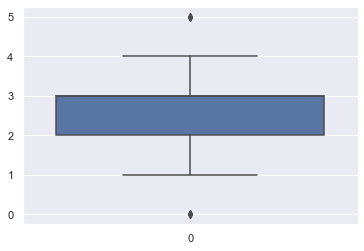

In [108]:
sns.boxplot(df['HourSpendOnApp'])

In [109]:
percentile25 = df['HourSpendOnApp'].quantile(0.25)
percentile75 = df['HourSpendOnApp'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.0

In [110]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 4.5
Lower limit 0.5


In [111]:
df[df['HourSpendOnApp'] > upper_limit]
df[df['HourSpendOnApp'] < lower_limit]
df.loc[:,['HourSpendOnApp']]

HourSpendOnApp
0                3.0
1                3.0
2                2.0
3                2.0
4                NaN
...              ...
5625             3.0
5626             3.0
5627             3.0
5628             4.0
5629             3.0

[5630 rows x 1 columns]

In [112]:
new_hsoa = df[df['HourSpendOnApp'] < upper_limit]
new_hsoa.shape

(5372, 20)

<Axes: >

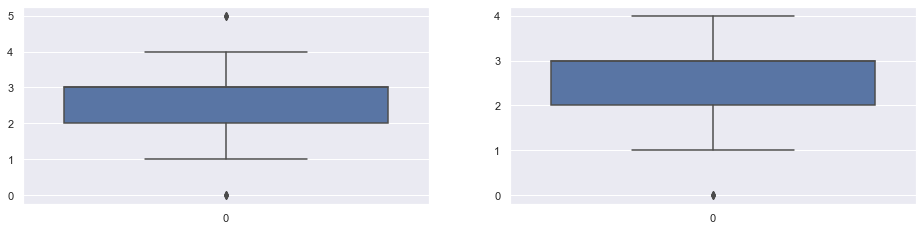

In [113]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['HourSpendOnApp'])

plt.subplot(2,2,2)
sns.boxplot(new_hsoa['HourSpendOnApp'])

### NumberOfAddress

In [114]:
percentile25 = df['NumberOfAddress'].quantile(0.25)
percentile75 = df['NumberOfAddress'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

4.0

In [115]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 12.0
Lower limit -4.0


In [116]:
df[df['NumberOfAddress'] > upper_limit]
df[df['NumberOfAddress'] < lower_limit]
df.loc[:,['NumberOfAddress']]

NumberOfAddress
0                   9
1                   7
2                   6
3                   8
4                   3
...               ...
5625                6
5626                6
5627                3
5628                4
5629                4

[5630 rows x 1 columns]

In [117]:
new_noa = df[df['NumberOfAddress'] < upper_limit]
new_noa.shape

(5626, 20)

<Axes: >

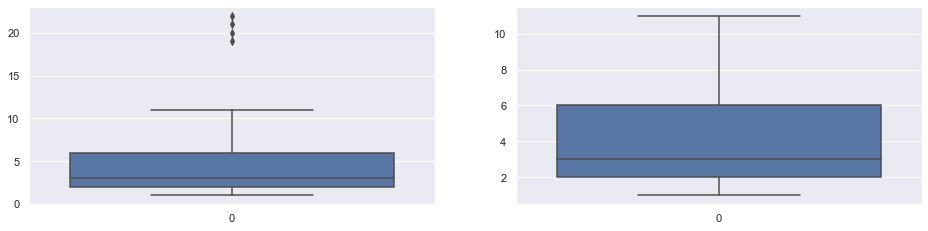

In [118]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['NumberOfAddress'])

plt.subplot(2,2,2)
sns.boxplot(new_noa['NumberOfAddress'])

### OrderAmountHikeFromLastYear

In [119]:
percentile25 = df['OrderAmountHikeFromlastYear'].quantile(0.25)
percentile75 = df['OrderAmountHikeFromlastYear'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

5.0

In [120]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 25.5
Lower limit 5.5


In [121]:
df[df['OrderAmountHikeFromlastYear'] > upper_limit]
df[df['OrderAmountHikeFromlastYear'] < lower_limit]
df.loc[:,['OrderAmountHikeFromlastYear']]

OrderAmountHikeFromlastYear
0                            11.0
1                            15.0
2                            14.0
3                            23.0
4                            11.0
...                           ...
5625                         18.0
5626                         16.0
5627                         21.0
5628                         15.0
5629                         13.0

[5630 rows x 1 columns]

In [122]:
new_oafly = df[df['OrderAmountHikeFromlastYear'] < upper_limit]
new_oafly.shape

(5332, 20)

<Axes: >

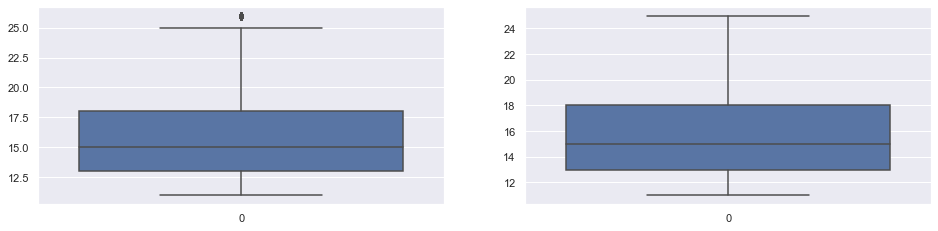

In [123]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['OrderAmountHikeFromlastYear'])

plt.subplot(2,2,2)
sns.boxplot(new_oafly['OrderAmountHikeFromlastYear'])

### CouponUsed

In [124]:
percentile25 = df['CouponUsed'].quantile(0.25)
percentile75 = df['CouponUsed'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.0

In [125]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 3.5
Lower limit -0.5


In [126]:
df[df['CouponUsed'] > upper_limit]
df[df['CouponUsed'] < lower_limit]
df.loc[:,['CouponUsed']]

CouponUsed
0            1.0
1            0.0
2            0.0
3            0.0
4            1.0
...          ...
5625         1.0
5626         1.0
5627         1.0
5628         2.0
5629         2.0

[5630 rows x 1 columns]

In [127]:
new_cu = df[df['CouponUsed'] < upper_limit]
new_cu.shape

(4745, 20)

<Axes: >

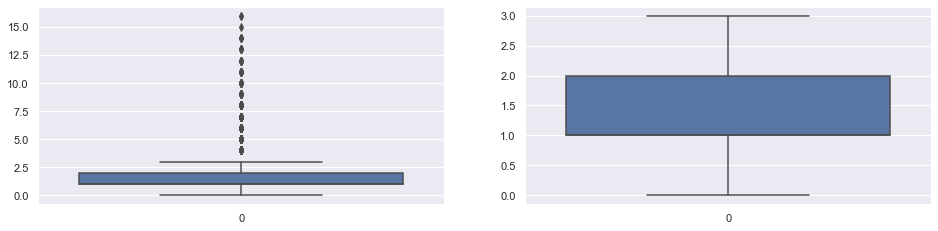

In [128]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['CouponUsed'])

plt.subplot(2,2,2)
sns.boxplot(new_cu['CouponUsed'])

### OrderCount

In [129]:
percentile25 = df['OrderCount'].quantile(0.25)
percentile75 = df['OrderCount'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

2.0

In [130]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 6.0
Lower limit -2.0


In [131]:
df[df['OrderCount'] > upper_limit]
df[df['OrderCount'] < lower_limit]
df.loc[:,['OrderCount']]

OrderCount
0            1.0
1            1.0
2            1.0
3            1.0
4            1.0
...          ...
5625         2.0
5626         2.0
5627         2.0
5628         2.0
5629         2.0

[5630 rows x 1 columns]

In [132]:
new_oc = df[df['OrderCount'] < upper_limit]
new_oc.shape

(4532, 20)

<Axes: >

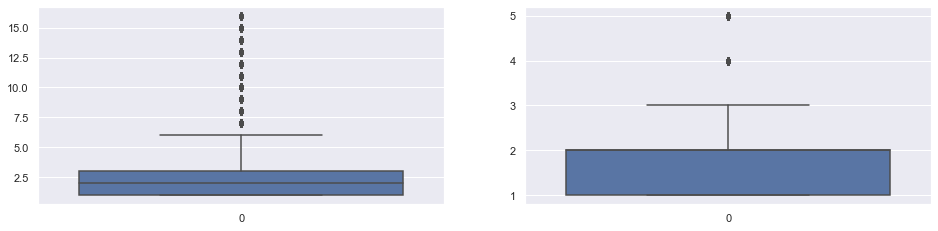

In [133]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['OrderCount'])

plt.subplot(2,2,2)
sns.boxplot(new_oc['OrderCount'])

### Tenure

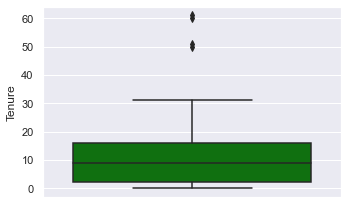

In [134]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['Tenure'],color='green', orient='v')
plt.tight_layout()
plt.show()

Data awal Tenure, ada beberapa pencilan dari data tersebut.

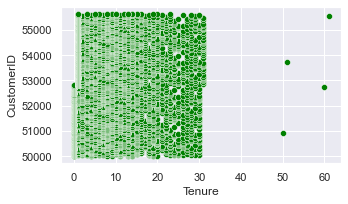

In [135]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=df, x=df['Tenure'], y=df['CustomerID'],color='green')
plt.tight_layout()
plt.show()

Dari visualisasi scatterplot di atas, terdapat 4 nilai yang jaraknya jauh dari distribusi.

In [136]:
df['Tenure'].value_counts()

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

Keempat nilai yang menjadi pencilan yakni 50, 51, 60, dan 61 atau bisa dikatakan di atas 31.

In [137]:
otenure = df[df['Tenure']>31]
otenure

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
928        50929      0    50.0         Mobile Phone         1   
2719       52720      0    60.0         Mobile Phone         3   
3743       53744      0    51.0         Mobile Phone         1   
5534       55535      0    61.0         Mobile Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
928               6.0           Debit Card    Male             3.0   
2719             27.0           Debit Card  Female             3.0   
3743              7.0           Debit Card    Male             4.0   
5534             28.0           Debit Card  Female             4.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
928                          1  Laptop & Accessory                  3   
2719                         3             Grocery                  1   
3743                         2  Laptop & Accessory                  3   
5534                         4             Grocery                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
928       Divorced                1         0                         24.0   
2719       Married                5         1                         13.0   
3743      Divorced                2         0                         25.0   
5534       Married                6         1                          NaN   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
928          1.0         2.0                8.0          149.00  
2719         NaN         1.0                0.0          278.75  
3743         2.0         3.0                9.0          174.00  
5534         1.0         2.0                1.0          303.75

Dari data di atas, terlihat bahwa data dari nilai-nilai pencilan tersebut tidak mengindikasikan bahwa customer churn. Hal tersebut mungkin terjadi karena kesalahan penulisan, sehingga saya hanya akan mengganti nilai-nilai pencilan tersebut dengan median saja yang robust terhadap outliers.

In [138]:
median_tenure = df['Tenure'].median(axis=0)
print('Median dari Tenure adalah', median_tenure)
df['Tenure'] = df['Tenure'].mask(df['Tenure']>31, median_tenure)

Median dari Tenure adalah 9.0


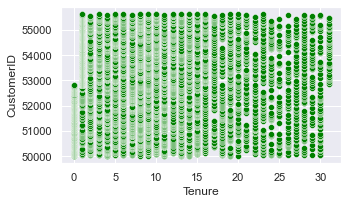

In [139]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=df, x=df['Tenure'], y=df['CustomerID'],color='green')
plt.tight_layout()
plt.show()

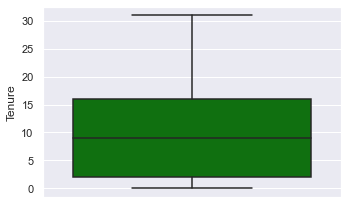

In [140]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['Tenure'],color='green', orient='v')
plt.tight_layout()
plt.show()

Setelah dilakukan transformasi, data 'Tenure' bebas dari pencilan.

### WarehouseToHome

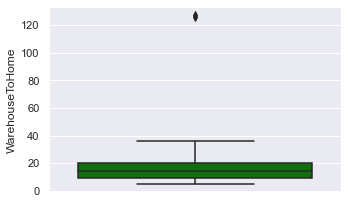

In [141]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['WarehouseToHome'],color='green', orient='v')
plt.tight_layout()
plt.show()

Visualisasi boxplot di atas menunjukkan bahwa ada beberapa data pencilan.

In [142]:
df['WarehouseToHome'].value_counts()

9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      93
18.0      89
26.0      89
25.0      86
21.0      85
24.0      85
27.0      81
29.0      81
19.0      75
20.0      74
28.0      71
33.0      67
34.0      63
36.0      51
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64

Nilai yang merupakan pencilan di atas adalah 126 dan 127 atau bisa dikatakan di atas 36.

In [143]:
owarehouse = df[df['WarehouseToHome']>36]
owarehouse

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1309       51310      0    25.0             Computer         3   
4124       54125      0    26.0             Computer         3   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
1309            126.0           Debit Card   Male             2.0   
4124            127.0           Debit Card   Male             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
1309                         3     Mobile Phone                  1   
4124                         4     Mobile Phone                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1309       Married                3         0                         15.0   
4124       Married                4         0                         16.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1309         1.0         1.0                0.0          134.82  
4124         2.0         2.0                1.0          159.82

Nilai pencilan tersebut juga tidak mengindikasikan bahwa customer churn. Hal di atas terjadi karena mungkin memang jarak warehouse ke rumah customer sangat jauh, tapi customer tetap ingin berlangganan dengan kita. Sehingga saya akan mengganti nilainya dengan nilai high limit dari WarehouseToHome(Q3 + (1.5 x IQR)) mempertimbangkan jarak orisinalnya yang memang paling jauh namun agar tidak menjadi pencilan.

In [144]:
q1warehouse = df['WarehouseToHome'].quantile(0.25)
q3warehouse = df['WarehouseToHome'].quantile(0.75)
iqrwarehouse = q3warehouse - q1warehouse
highlimit_warehouse = q3warehouse + (iqrwarehouse * 1.5)
print ('Nilai High Limit dari WarehouseToHome adalah', highlimit_warehouse)

Nilai High Limit dari WarehouseToHome adalah 36.5


In [145]:
df['WarehouseToHome'] = df['WarehouseToHome'].mask(df['WarehouseToHome']>36, highlimit_warehouse)

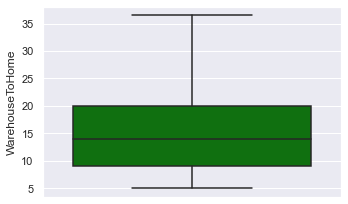

In [146]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['WarehouseToHome'],color='green', orient='v')
plt.tight_layout()
plt.show()

Setelah dilakukan transformasi sedemikian rupa, data WarehouseToHome bebas dari nilai pencilan.

### NumberOfDeviceRegistered

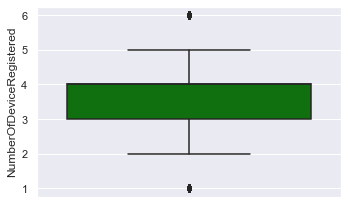

In [147]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['NumberOfDeviceRegistered'],color='green', orient='v')
plt.tight_layout()
plt.show()

In [148]:
df['NumberOfDeviceRegistered'].value_counts()

4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

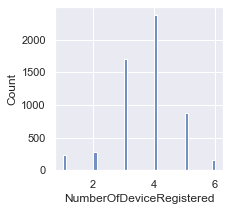

In [149]:
fig = plt.subplots(figsize=(3,3))
sns.histplot(df, x='NumberOfDeviceRegistered', linewidth=1)
plt.show

Dilihat dari visualisasi di atas, persebaran data NumberOfDeviceRegistered memiliki beberapa nilai pencilan. Namun, nilai-nilai tersebut menjadi pencilan karena persebaran data yang intens di tengah-tengah. Selain itu, distribusi datanya masih normal sehingga tidak mempengaruhi agregasi nantinya. Dengan demikian, saya tidak melakukan perubahan terhadap data NumberOfDeviceRegistered.

### DaySinceLastOrder

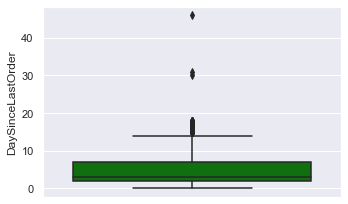

In [150]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['DaySinceLastOrder'],color='green', orient='v')
plt.tight_layout()
plt.show()

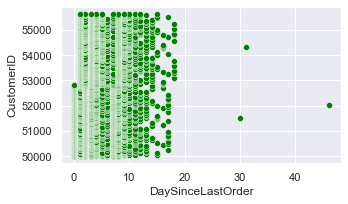

In [151]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=df, x=df['DaySinceLastOrder'], y=df['CustomerID'],color='green')
plt.tight_layout()
plt.show()

Dari visualisasi di atas dapat dilihat hanya ada sebagian kecil nilai yang jauh dari distribusi sehingga menjadi nilai pencilan atau bisa di bilang nilainya di atas 20.

In [152]:
odslo = df[df['DaySinceLastOrder']>20]
odslo

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1490       51491      0     3.0         Mobile Phone         1   
2040       52041      1     0.0         Mobile Phone         3   
4305       54306      0     4.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1490             11.0     Cash on Delivery  Female             2.0   
2040              6.0           Debit Card    Male             2.0   
4305             12.0     Cash on Delivery  Female             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
1490                         3     Mobile Phone                  5   
2040                         4          Fashion                  3   
4305                         4     Mobile Phone                  5   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1490       Married                6         0                         14.0   
2040       Married                6         0                         11.0   
4305       Married                7         0                         15.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1490         0.0         2.0               30.0          132.04  
2040         5.0        11.0               46.0          206.09  
4305         1.0         3.0               31.0          157.04

Dari keterangan di atas dapat dilihat bahwa hanya ada 1 customer yang churn dan nilai DaySinceLastOrder nya paling jauh yakni 46 hari. Saya dapat berasumsi kalau customer tersebut memang sudah tidak berlangganan dengan kita lagi sehingga saya akan mengeleminasi customer tersebut dan mengubah nilai yang masih belum churn menjadi nilai dari High Limit DaySinceLastOrder(Q3 + (1.5 x IQR)).

In [153]:
df = df.drop(df[df['DaySinceLastOrder']>31].index, axis=0)
odslo = df[df['DaySinceLastOrder']>20]
odslo

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1490       51491      0     3.0         Mobile Phone         1   
4305       54306      0     4.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1490             11.0     Cash on Delivery  Female             2.0   
4305             12.0     Cash on Delivery  Female             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
1490                         3     Mobile Phone                  5   
4305                         4     Mobile Phone                  5   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1490       Married                6         0                         14.0   
4305       Married                7         0                         15.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1490         0.0         2.0               30.0          132.04  
4305         1.0         3.0               31.0          157.04

Customer dengan nilai DaySinceLastOrder 46 days telah hilang, sekarang tinggal mengubah nilai yang masih di atas 20 menjadi High Limit.

In [154]:
q1dslo = df['DaySinceLastOrder'].quantile(0.25)
q3dslo = df['DaySinceLastOrder'].quantile(0.75)
iqrdslo = q3dslo - q1dslo
highlimit_dslo = q3dslo + (iqrdslo * 1.5)
print ('Nilai High Limit dari DaySinceLastOrder adalah', highlimit_dslo)

Nilai High Limit dari DaySinceLastOrder adalah 14.5


In [155]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].mask(df['DaySinceLastOrder']>20, highlimit_dslo)

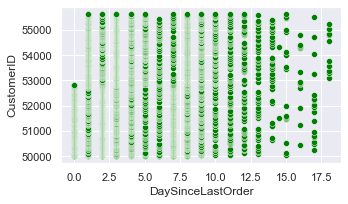

In [156]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=df, x=df['DaySinceLastOrder'], y=df['CustomerID'],color='green')
plt.tight_layout()
plt.show()

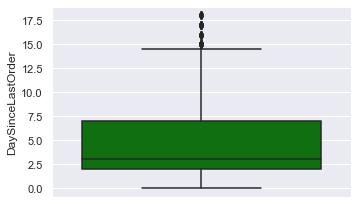

In [157]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['DaySinceLastOrder'],color='green', orient='v')
plt.tight_layout()
plt.show()

Masih ada beberapa pencilan dari DaySinceLastOrder tapi bukan menjadi masalah, itu hanya terjadi karena banyaknya distribusi nilai di tengah2 sehingga seakan-akan terlihat ada outliers.

### CashbackAmount

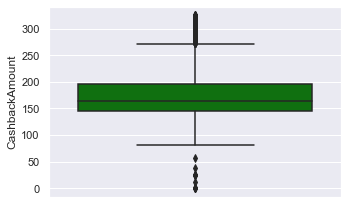

In [158]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['CashbackAmount'],color='green', orient='v')
plt.tight_layout()
plt.show()

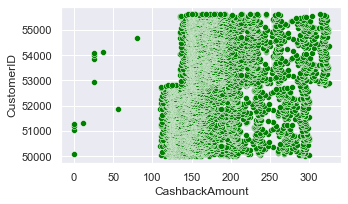

In [159]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=df, x=df['CashbackAmount'], y=df['CustomerID'],color='green')
plt.tight_layout()
plt.show()

Pada case CashbackAmount ini terlihat ada beberapa nilai pencilan di bawah 100.

In [160]:
quantile_cashback = df[['CashbackAmount']].quantile([0.1, 0.2, 0.3, 0.4, 0.5])
quantile_cashback

CashbackAmount
0.1         126.860
0.2         140.798
0.3         148.328
0.4         153.638
0.5         163.230

In [161]:
ocashback = df[df['CashbackAmount']<100]
ocashback

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
101        50102      0    10.0             Computer         3   
1026       51027      0     1.0         Mobile Phone         1   
1176       51177      0    30.0             Computer         3   
1255       51256      0     8.0         Mobile Phone         3   
1300       51301      0     6.0         Mobile Phone         1   
1850       51851      0     0.0         Mobile Phone         1   
2916       52917      0    11.0             Computer         3   
3841       53842      0     2.0         Mobile Phone         1   
3991       53992      0    31.0             Computer         3   
4070       54071      0     9.0         Mobile Phone         3   
4115       54116      0     7.0         Mobile Phone         1   
4665       54666      0     1.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
101              10.0             E wallet    Male             2.0   
1026             33.0          Credit Card  Female             2.0   
1176              8.0          Credit Card    Male             2.0   
1255             24.0          Credit Card    Male             3.0   
1300             21.0          Credit Card  Female             3.0   
1850             12.0           Debit Card  Female             3.0   
2916             11.0             E wallet    Male             3.0   
3841             34.0          Credit Card  Female             3.0   
3991              9.0          Credit Card    Male             3.0   
4070             25.0          Credit Card    Male             4.0   
4115             22.0          Credit Card  Female             4.0   
4665             13.0           Debit Card  Female             4.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
101                          3        Mobile Phone                  2   
1026                         5  Laptop & Accessory                  5   
1176                         3             Grocery                  4   
1255                         3  Laptop & Accessory                  5   
1300                         3  Laptop & Accessory                  1   
1850                         3        Mobile Phone                  1   
2916                         4        Mobile Phone                  2   
3841                         6  Laptop & Accessory                  5   
3991                         4             Grocery                  4   
4070                         4  Laptop & Accessory                  5   
4115                         4  Laptop & Accessory                  1   
4665                         4        Mobile Phone                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
101        Married                5         0                         17.0   
1026       Married                1         0                         21.0   
1176       Married                5         0                         22.0   
1255       Married                1         0                         16.0   
1300       Married                1         1                         13.0   
1850       Married                2         1                         13.0   
2916       Married                6         0                         18.0   
3841       Married                2         0                         22.0   
3991       Married                6         0                         23.0   
4070       Married                2         0                         17.0   
4115       Married                2         1                         14.0   
4665       Married                3         1                         14.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
101          1.0         5.0                8.0             0.0  
1026         1.0         1.0                0.0             0.0  
1176        10.0        14.0               14.0             0.0  
1255   

Customer yang CashbackAmountnya di bawah 100, tidak ada yang churn. Sehingga saya memutuskan untuk tidak mengeleminasi nilai-nilai di bawah 100 melainkan mengganti nilainya dengan Percentile 10%.

In [162]:
P10cashback = round(df['CashbackAmount'].quantile(0.1))

print('Nilai Percentile 10 dari CashbackAmount adalah', P10cashback)

Nilai Percentile 10 dari CashbackAmount adalah 127


In [163]:
df['CashbackAmount'] = df['CashbackAmount'].mask(df['CashbackAmount']<100, P10cashback)

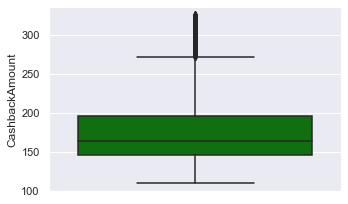

In [164]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['CashbackAmount'],color='green', orient='v')
plt.tight_layout()
plt.show()

Masih terdapat banyak nilai pencilan di atas 250, sehingga saya akan melakukan transformasi terhadap angka-angka tersebut menjadi Percentile 90. Namun sebelum itu, saya akan check dulu. Jika ada customer yang churn, akan saya eliminasi dulu sebelum akhirnya customer-customer yang tidak churn saya ubah nilainya menjadi Percentile 90.

In [165]:
overcashback = df[df['CashbackAmount']>250]
overcashback

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
10         50011      1     4.0         Mobile Phone         1   
40         50041      0    23.0         Mobile Phone         1   
61         50062      0    13.0         Mobile Phone         1   
62         50063      0    28.0         Mobile Phone         1   
65         50066      0    25.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5590       55591      0    12.0         Mobile Phone         1   
5592       55593      0    11.0         Mobile Phone         1   
5597       55598      0    13.0             Computer         1   
5603       55604      0    16.0         Mobile Phone         1   
5605       55606      0    15.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
10               18.0     Cash on Delivery  Female             2.0   
40               17.0           Debit Card  Female             2.0   
61               10.0          Credit Card  Female             2.0   
62               20.0          Credit Card    Male             3.0   
65                6.0           Debit Card    Male             3.0   
...               ...                  ...     ...             ...   
5590             17.0          Credit Card  Female             4.0   
5592             17.0           Debit Card  Female             3.0   
5597             16.0           Debit Card    Male             3.0   
5603              9.0           Debit Card    Male             3.0   
5605             35.0           Debit Card  Female             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
10                           3           Others                  3   
40                           3           Others                  4   
61                           3           Others                  3   
62                           2           Others                  4   
65                           4           Others                  3   
...                        ...              ...                ...   
5590                         6          Fashion                  3   
5592                         2          Fashion                  1   
5597                         4           Others                  1   
5603                         4           Others                  3   
5605                         5          Grocery                  4   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
10        Divorced                2         0                          NaN   
40          Single                4         0                          NaN   
61        Divorced                2         0                         14.0   
62          Single                9         0                         11.0   
65        Divorced                1         0                          NaN   
...            ...              ...       ...                          ...   
5590       Married                5         0                         13.0   
5592       Married                3         1                         26.0   
5597        Single                4         0                          NaN   
5603       Married                7         0                          NaN   
5605       Married                2         0                         24.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
10           9.0        15.0                8.0          295.45  
40           2.0         4.0                4.0          299.26  
61           NaN         9.0                9.0          290.33  
62           NaN         2.0               15.0          287.22  
65           1.0        11.0                9.0          299.99  
...          ...         ...                ...             ...  
5590         1.0         NaN               12.0          257.06  
5592         NaN         7.0                9.0          262.44  


In [166]:
overcashback['Churn'].value_counts()

0    588
1     30
Name: Churn, dtype: int64

Ternyata ada 30 customer yang churn. Pertama-tama saya eliminasi dulu customer yang churn, lalu saya transformasikan nilai customer yang tidak churn.

In [167]:
df = df.drop(df[(df['CashbackAmount']>250) & (df['Churn']==1)].index, axis=0)

In [168]:
overcashback = df[df['CashbackAmount']>250]
overcashback['Churn'].value_counts()

0    588
Name: Churn, dtype: int64

Sudah tidak ada customer yang nilainya di atas 250 dan churn. Sekarang tinggal transformasikan nilainya.

In [169]:
P90cashback = round(df['CashbackAmount'].quantile(0.9))
print('Nilai Percentile 90 adalah', P90cashback)

Nilai Percentile 90 adalah 257


In [170]:
df['CashbackAmount'] = df['CashbackAmount'].mask(df['CashbackAmount']>250, P90cashback)

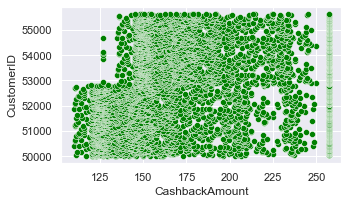

In [171]:
fig = plt.subplots(figsize=(5,3))
sns.scatterplot(data=df, x=df['CashbackAmount'], y=df['CustomerID'],color='green')
plt.tight_layout()
plt.show()

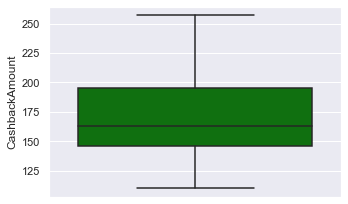

In [172]:
fig = plt.subplots(figsize=(5,3))
sns.boxplot(y=df['CashbackAmount'],color='green', orient='v')
plt.tight_layout()
plt.show()

Data CashbackAmount bebas dari pencilan.

## Handling Missing Data

In [173]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    251
CouponUsed                     248
OrderCount                     254
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [174]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    251
CouponUsed                     248
OrderCount                     254
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Tenure

In [175]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df = df.reset_index()
print(df['Tenure'])

0        4.0
1        9.0
2        9.0
3        0.0
4        0.0
        ... 
5594    10.0
5595    13.0
5596     1.0
5597    23.0
5598     8.0
Name: Tenure, Length: 5599, dtype: float64


Missing value pada feature Tenure tidak didrop meskipun presentasenya <10% sebab ada 81 data Tenure yang NaN dan Churn nya 1, kalau didrop data yang Churnnya 1 akan semakin sedikit mengingat data yang memiliki nilai 1 di Churn hanya 18% dari total data di feature Churn. Nilai Median dipilih untuk mengisi missing value agar distribusi data nya terjaga tetap normal

### WarehouseToHome

In [176]:
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df = df.reset_index()
print(df['WarehouseToHome'])

0        6.0
1        8.0
2       30.0
3       15.0
4       12.0
        ... 
5594    30.0
5595    13.0
5596    11.0
5597     9.0
5598    15.0
Name: WarehouseToHome, Length: 5599, dtype: float64


Ada 251 data WarehouseToHome yang missing dan 84 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### HourSpendOnApp

In [177]:
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean())
df = df.reset_index(drop=True)
print(df['HourSpendOnApp'])

0       3.000000
1       3.000000
2       2.000000
3       2.000000
4       2.931325
          ...   
5594    3.000000
5595    3.000000
5596    3.000000
5597    4.000000
5598    3.000000
Name: HourSpendOnApp, Length: 5599, dtype: float64


Ada 255 data HourSpendonApp yang missing dan 58 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### OrderAmountHikeFromLastYear

In [178]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df = df.reset_index(drop=True)
print(df['OrderAmountHikeFromlastYear'])

0       11.0
1       15.0
2       14.0
3       23.0
4       11.0
        ... 
5594    18.0
5595    16.0
5596    21.0
5597    15.0
5598    13.0
Name: OrderAmountHikeFromlastYear, Length: 5599, dtype: float64


Ada 251 data OrderAmountHikeFromlastYear yang missing dan 14 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### CouponUsed

In [179]:
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].mean())
df['CouponUsed'] = df['CouponUsed'].reset_index(drop=True)
print(df['CouponUsed'])

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
5594    1.0
5595    1.0
5596    1.0
5597    2.0
5598    2.0
Name: CouponUsed, Length: 5599, dtype: float64


Ada 248 data CouponUsed yang missing dan 8 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### OrderCount

In [180]:
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())
df = df.reset_index(drop=True)
print(df['OrderCount'])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5594    2.0
5595    2.0
5596    2.0
5597    2.0
5598    2.0
Name: OrderCount, Length: 5599, dtype: float64


Ada 254 data OrderCount yang missing dan 18 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

### DaySinceLastOrder

In [181]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())
df = df.reset_index(drop=True)
print(df['DaySinceLastOrder'])

0       5.0
1       0.0
2       3.0
3       3.0
4       3.0
       ... 
5594    4.0
5595    3.0
5596    4.0
5597    9.0
5598    3.0
Name: DaySinceLastOrder, Length: 5599, dtype: float64


Ada 307 data DaySinceLastOrder yang missing dan 54 di antaranya adalah Customer yang Churn (Churn = 1) sehingga kami tidak memilih untuk mendrop datanya karena dikhawatirkan data yg Churn = 1 akan semakin sedikit sehingga kami memilih untuk mengisi data yg missing. Nilai median dipilih untuk mengisi missing value dimaksudkan agar data nya tetap terdistribusi normal

In [182]:
df.isna().sum()

level_0                        0
index                          0
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Setelah dilakukan data preprocessing, DataFrame sudah bebas dari missing value.

<h2>Feature Transformation</h2>


In [183]:
nf = df.drop(['level_0','index','CustomerID',
                                    'Churn','CityTier','SatisfactionScore',
                                    'Complain'],axis=1)

In [184]:
nf = nf.select_dtypes(include = 'number')

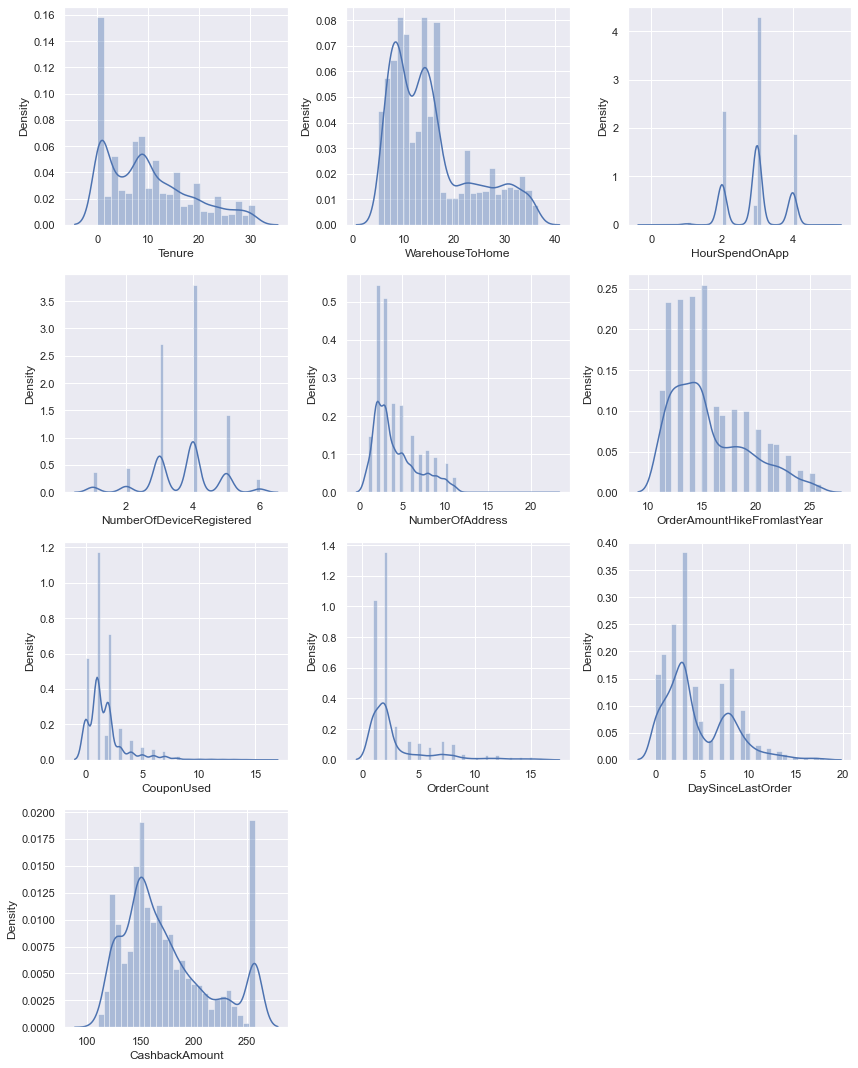

In [185]:
num = nf.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(num)):
    plt.subplot(4, int(len(num)/3), i+1)
    sns.distplot(nf[num[i]])
plt.tight_layout()
plt.show()

<p align = 'justify'>
<i>Normal distribution</i> is a very important distribution in Statistics, but usually the features in the real-life data are not normally distributed.

<ul>Transformations present in scikit-learn:
    <li>Function Transformation</li>
    <ul><i>Log Transformation</i>
        <li>Mostly applied to right-skewed data</li>
        <li>Make data close to a normal distribution but not able to exactly abide by a normal distribution</li>
        <li>Convert data from additive scale to multiplicative scale</li>
        <li>Not applied to those feature which have negative</li>
    </ul>
    <ul><i>Reciprocal Transformation</i>
        <li>Not defined for zero</li>
        <li>Radical effect</li>
        <li>Reverses the order among values of the same sign</li>
    </ul>
    <ul><i>Square and Squareroot Transformation</i>
        <li>Left-skewed data (Square Transformation</li>
        <li>Defined only for positive number</li>
        <li>Can be used for reducing the skewness of right-skewed data</li>
    </ul>
<li>Power Transformation</li>
    <ul>
        <li>Output is more 'Gaussian' like</li>
        <li>Box-cox and Yeo-johnson transforms</li>
        <li>Box-cox requires the input data to be strictly positive (not even zero is acceptable)</li>
        <li>Yeo-johnson accep zero and negatives
<li>Quantile Transformation</li>


Reference : <a href='https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/'>Feature Transformation in Data Science</a>

<h3> Power Transform </h3>

In [186]:
powt = nf

In [187]:
from sklearn.preprocessing import PowerTransformer

#create the power transformer object
pt = PowerTransformer()

#fit and transform
df_transformed = pt.fit_transform(powt)

#dataframe of transformed data
df_transformed_df = pd.DataFrame(df_transformed, 
                                 columns=nf.columns)

print('Original Data: \n', nf)
print('Transformed Data: \n', df_transformed_df)

Original Data: 
       Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0        4.0              6.0        3.000000                         3   
1        9.0              8.0        3.000000                         4   
2        9.0             30.0        2.000000                         4   
3        0.0             15.0        2.000000                         4   
4        0.0             12.0        2.931325                         3   
...      ...              ...             ...                       ...   
5594    10.0             30.0        3.000000                         2   
5595    13.0             13.0        3.000000                         5   
5596     1.0             11.0        3.000000                         2   
5597    23.0              9.0        4.000000                         5   
5598     8.0             15.0        3.000000                         2   

      NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0   

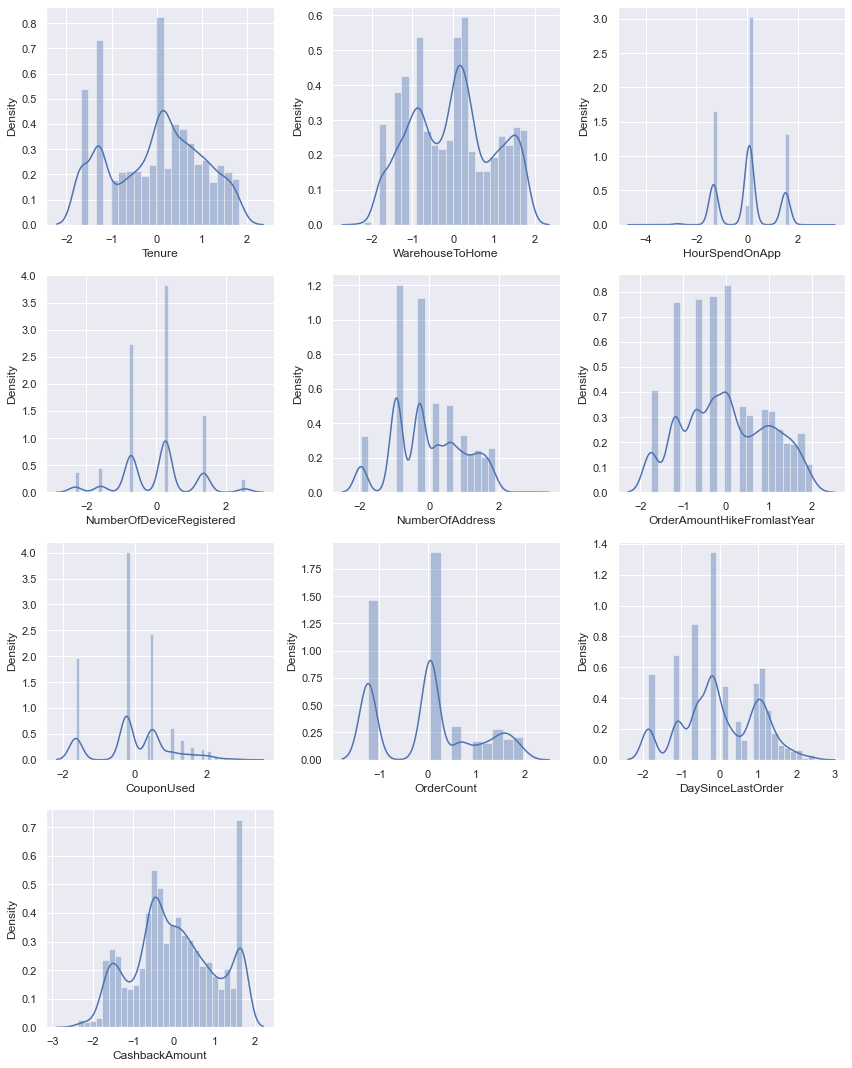

In [188]:
tf = df_transformed_df.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(tf)):
    plt.subplot(4, int(len(tf)/3), i+1)
    sns.distplot(df_transformed_df[tf[i]])
plt.tight_layout()
plt.show()

<Axes: >

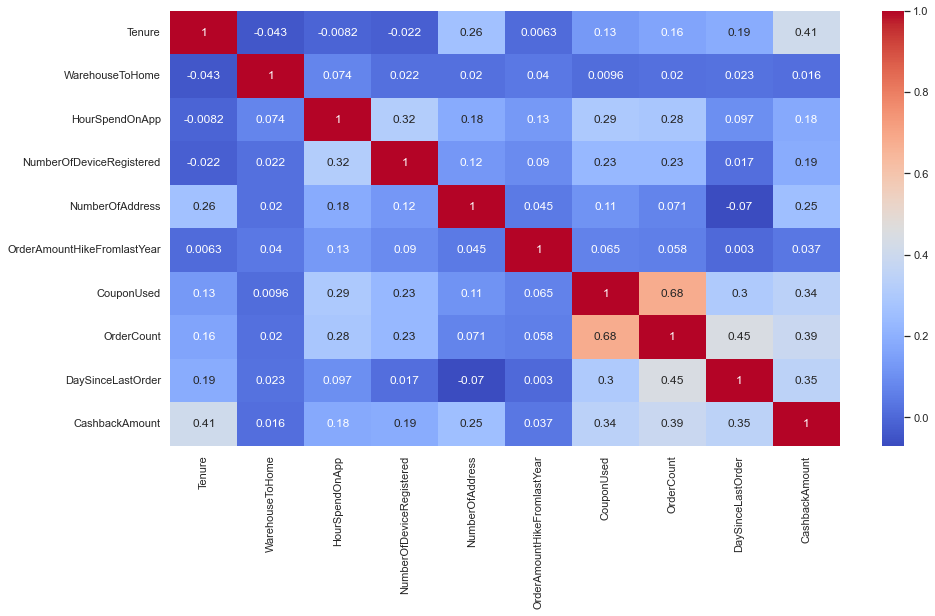

In [189]:
plt.figure(figsize=(15,8))
corr = df_transformed_df.corr()
sns.heatmap(corr, annot=True,
            cmap='coolwarm')

<h3>Log Transformation</h3>

In [190]:
df_log = np.log(nf)
print(df_log)

        Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     1.386294         1.791759        1.098612                  1.098612   
1     2.197225         2.079442        1.098612                  1.386294   
2     2.197225         3.401197        0.693147                  1.386294   
3         -inf         2.708050        0.693147                  1.386294   
4         -inf         2.484907        1.075454                  1.098612   
...        ...              ...             ...                       ...   
5594  2.302585         3.401197        1.098612                  0.693147   
5595  2.564949         2.564949        1.098612                  1.609438   
5596  0.000000         2.397895        1.098612                  0.693147   
5597  3.135494         2.197225        1.386294                  1.609438   
5598  2.079442         2.708050        1.098612                  0.693147   

      NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount 

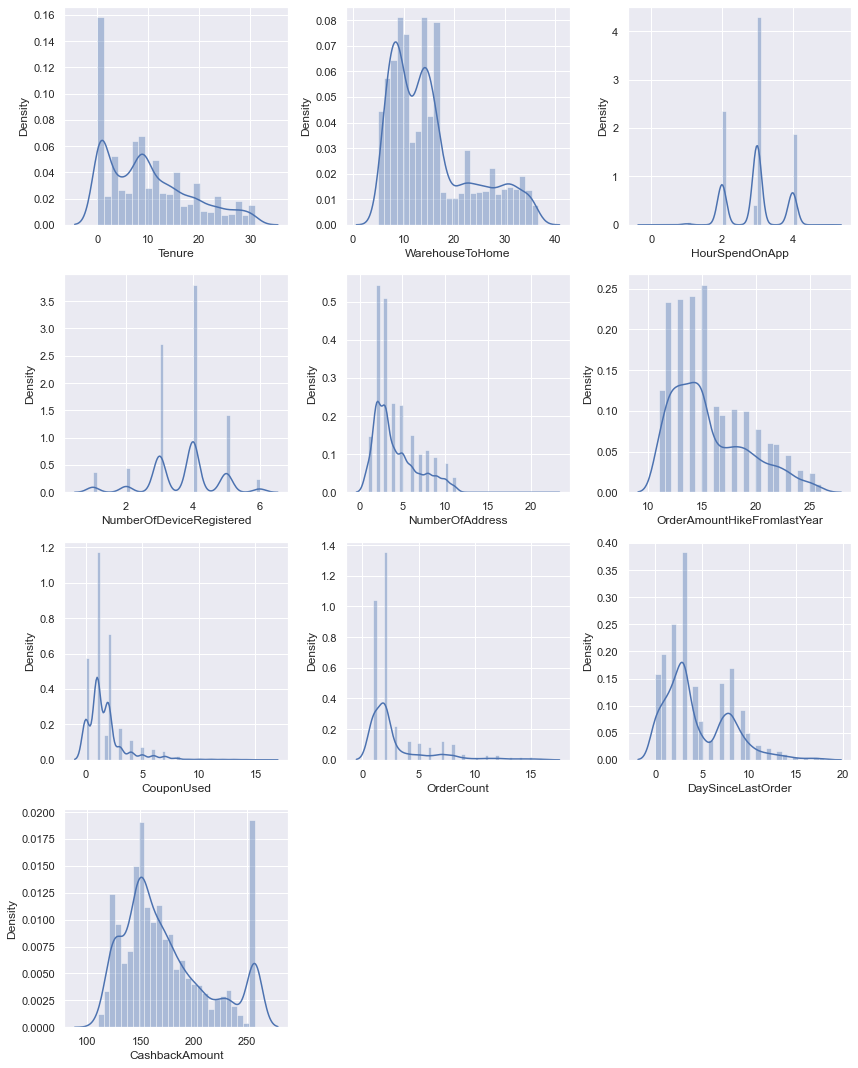

In [191]:
logf = df_log.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(num)):
    plt.subplot(4, int(len(num)/3), i+1)
    sns.distplot(df[logf[i]])
plt.tight_layout()
plt.show()

<Axes: >

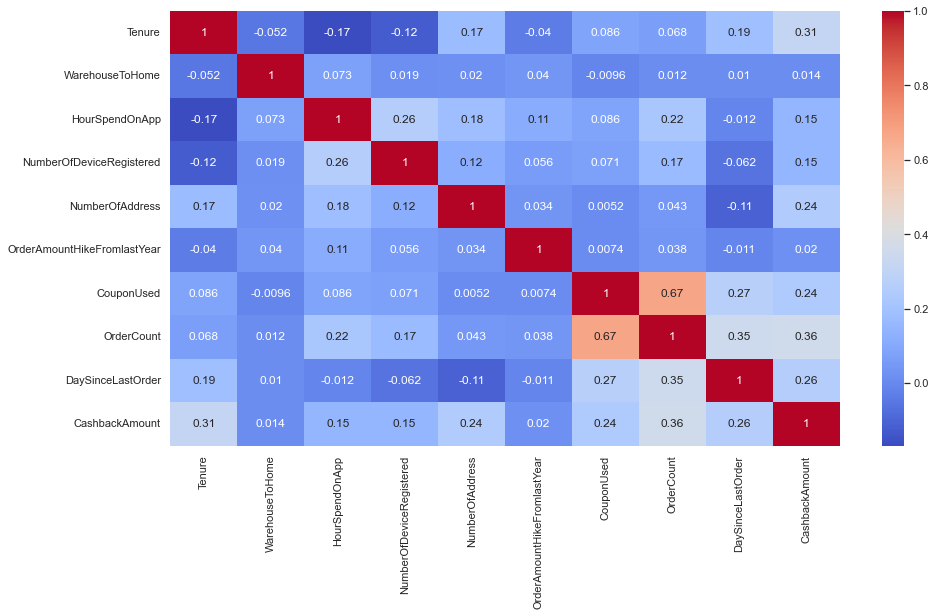

In [192]:
plt.figure(figsize=(15,8))
corr = df_log.corr()
sns.heatmap(corr, annot=True,
            cmap='coolwarm')

<h3>Square Root</h3>

In [193]:
df_sqrt= np.sqrt(nf)
print(df_sqrt)

        Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     2.000000         2.449490        1.732051                  1.732051   
1     3.000000         2.828427        1.732051                  2.000000   
2     3.000000         5.477226        1.414214                  2.000000   
3     0.000000         3.872983        1.414214                  2.000000   
4     0.000000         3.464102        1.712111                  1.732051   
...        ...              ...             ...                       ...   
5594  3.162278         5.477226        1.732051                  1.414214   
5595  3.605551         3.605551        1.732051                  2.236068   
5596  1.000000         3.316625        1.732051                  1.414214   
5597  4.795832         3.000000        2.000000                  2.236068   
5598  2.828427         3.872983        1.732051                  1.414214   

      NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount 

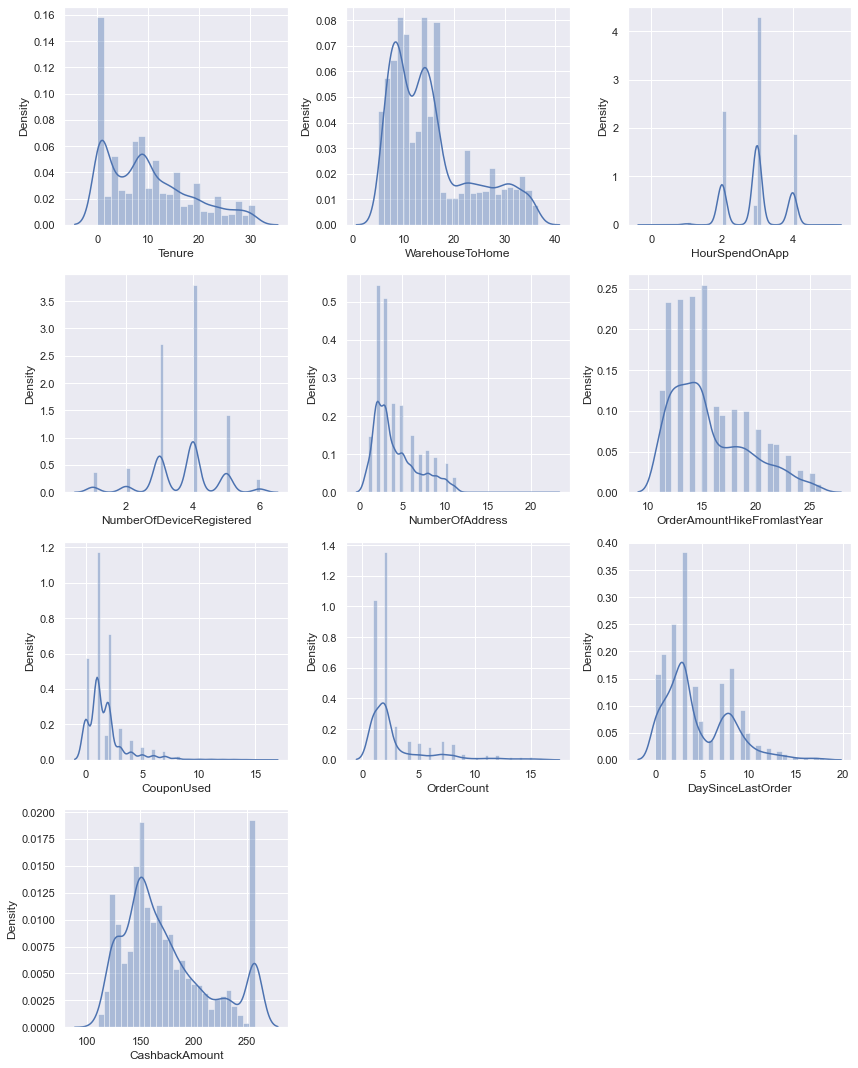

In [194]:
sqrttf = df_sqrt.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(num)):
    plt.subplot(4, int(len(num)/3), i+1)
    sns.distplot(df[sqrttf[i]])
plt.tight_layout()
plt.show()

<Axes: >

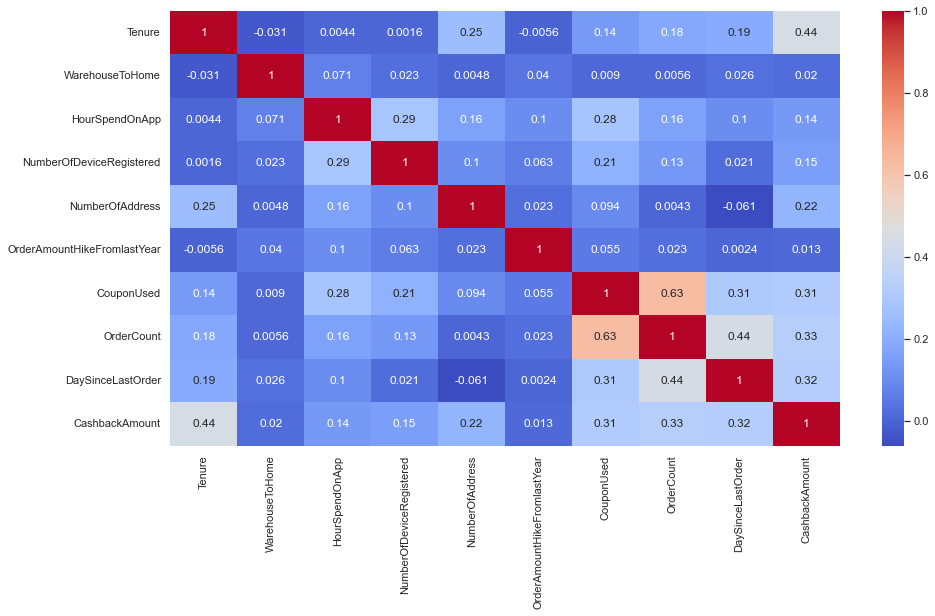

In [195]:
plt.figure(figsize=(15,8))
corr = df_sqrt.corr()
sns.heatmap(corr, annot=True,
            cmap='coolwarm')

<h3>Skewness and Kurtoses</h3>

#Measures of Skewness and Kurtosis in Python<br>
As rule of thumb, skewness can be interpreted like this: 
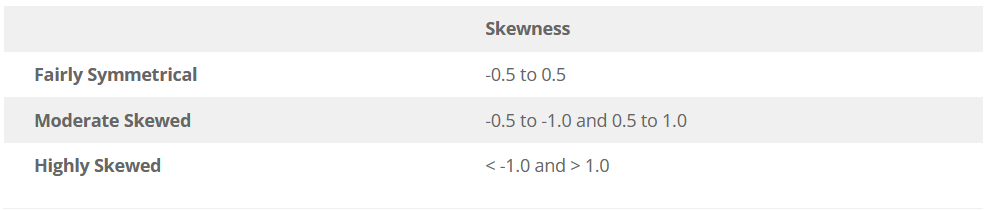


source : https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

The measure of Kurtosis refers to the tailedness of a distribution. Tailedness refres how often the outliers occur. Excess kurtosis irelative to a normal distribution.<br>
Peakedness in a data distribution is the degree to which data values are concentrated around the mean. Datasets with high kurtosis tend to have a distinct peak near the mean, decline rapidly, and have heavy tails. Datasets with low kurtosis tend to have a flat top near the mean rather than a sharp peak.<br>
A large kurtosis indicates that there are high probabilities, on the other hand, a small kurtosis signals that the probabilities low.<br>
source : https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#What_Is_Skewness?

In [196]:
#Measure skewed before features being transformed
skewkurtosis_before = nf.agg(['skew', 'kurtosis']).transpose()
print(skewkurtosis_before)

                                 skew  kurtosis
Tenure                       0.691875 -0.384317
WarehouseToHome              0.944011 -0.135792
HourSpendOnApp              -0.027922 -0.556532
NumberOfDeviceRegistered    -0.405697  0.590705
NumberOfAddress              1.095935  0.987546
OrderAmountHikeFromlastYear  0.831931 -0.138631
CouponUsed                   2.624791  9.910219
OrderCount                   2.283805  5.220967
DaySinceLastOrder            0.939617  0.479950
CashbackAmount               0.788308 -0.398074


Based on our measurement above, we know that: <br>
- Features that has Fairly symmetrical are CustomerID, HoursSpendOnApp,NumberOfDeviceRegistered<br>
- Features that has Moderate skewed are WarehouseHome, HourSpendOnApp, NumberOfDeviceRegsitered, SatisfactionScore, DaysSinceLastOrder,CashbackAmount,Complain, OrderAmountHikeFromLastYear,Tenure,CitiTier<br>
- Features that has Highly skewed are Churn, NumberOfAddress,CouponUsed,OrderCount

In [197]:
#Measure skewed after features being transformed with power transform
measure_pow= df_transformed_df.agg(['skew', 'kurtosis']).transpose()
print(measure_pow)

                                 skew  kurtosis
Tenure                      -0.137225 -0.998889
WarehouseToHome              0.047275 -0.973447
HourSpendOnApp              -0.029360 -0.555104
NumberOfDeviceRegistered     0.014593  0.283069
NumberOfAddress              0.028443 -0.727459
OrderAmountHikeFromlastYear  0.082741 -0.925506
CouponUsed                   0.002590 -0.119356
OrderCount                   0.222648 -0.976379
DaySinceLastOrder           -0.038130 -0.663028
CashbackAmount               0.066707 -0.820798


In [198]:
#Measure skewed after features being log transformed
Measure_log= df_log.agg(['skew', 'kurtosis']).transpose()
print(Measure_log)

                                 skew  kurtosis
Tenure                            NaN       NaN
WarehouseToHome              0.213819 -0.926796
HourSpendOnApp                    NaN       NaN
NumberOfDeviceRegistered    -1.836811  4.416231
NumberOfAddress             -0.051092 -0.591515
OrderAmountHikeFromlastYear  0.469522 -0.690941
CouponUsed                        NaN       NaN
OrderCount                   0.845508 -0.033533
DaySinceLastOrder                 NaN       NaN
CashbackAmount               0.442976 -0.723903


In [199]:
#Measure skewed after features being squareroot transformed
Measure_sqrt= df_sqrt.agg(['skew', 'kurtosis']).transpose()
print(Measure_sqrt)

                                 skew  kurtosis
Tenure                      -0.231876 -0.791800
WarehouseToHome              0.592183 -0.646762
HourSpendOnApp              -0.514041  1.574488
NumberOfDeviceRegistered    -1.066958  1.906089
NumberOfAddress              0.543517 -0.436723
OrderAmountHikeFromlastYear  0.649206 -0.458913
CouponUsed                   0.227539  0.703186
OrderCount                   1.549739  1.882819
DaySinceLastOrder           -0.210312 -0.252234
CashbackAmount               0.620008 -0.585013


After being transformed, skew got  nearer to normal distribution

<h3> Data Splitting </h3>

In [200]:
#make dataset for splitting
X = df.drop(['CustomerID','Churn'],axis=1)
y = df[['Churn']]

In [201]:
#splitting the data into Train and Test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
#menentukan metode transformasi
from scipy.stats import boxcox

df_transformed, lmda = stats.boxcox(df['NumberOfAddress'])

In [203]:
print('dataset shape :',df.shape)
print('X train :',Xtrain.shape)
print('X test :',Xtest.shape)
print('y train :',ytrain.shape)
print('y test :',ytest.shape)

dataset shape : (5599, 22)
X train : (3919, 20)
X test : (1680, 20)
y train : (3919, 1)
y test : (1680, 1)


<h2>Feature Encoding</h2>

<p align = 'justify'>
Mengubah feature Catergorical menjadi Numerical
    
<li>Teknik Label Encoding, digunakan jika feature dengan variabel yang memiliki urutan/peringkat.</li>
<li>Teknik One-Hot-Encoding, digunakan jika feature dengan variabel hanyalah nama dan tidak ada urutan atau peringkat pada feature variabel ini.</li>

<a href='https://medium.com/nerd-for-tech/nominal-and-ordinal-encoding-in-data-science-c93872601f16'>Referensi aturan Feature Encoding</a>

<h3>PreferredLoginDevice</h3>

In [204]:
df_PreferredLoginDevice=pd.get_dummies(df['PreferredLoginDevice'], prefix='PreferredLoginDevice')
df_PreferredLoginDevice.head(4)

PreferredLoginDevice_Computer  PreferredLoginDevice_Mobile Phone
0                              0                                  1
1                              0                                  1
2                              0                                  1
3                              0                                  1

<h3>PreferredPaymentMode</h3>

In [205]:
df_PreferredPaymentMode=pd.get_dummies(df['PreferredPaymentMode'], prefix='PreferredPaymentMode')
df_PreferredPaymentMode.head(4)

PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   

   PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0                                1                              0   
1                                0                              0   
2                                1                              0   
3                                1                              0   

   PreferredPaymentMode_UPI  
0                         0  
1                         1  
2                         0  
3                         0

<h3>Gender</h3>

In [206]:
mapping_gender={
    'Male':0,
    'Female':1
}
df_gender=df['Gender'].map(mapping_gender)
df_gender.head(4)

0    1
1    0
2    0
3    0
Name: Gender, dtype: int64

<h3>PreferedOrderCat</h3>

<h3>MaritalStatus</h3>

In [207]:
#MERGE COLUMN ENCODING
df_PreferredLoginDevice = df_PreferredLoginDevice.reset_index(drop=True)
df_PreferredPaymentMode = df_PreferredPaymentMode.reset_index(drop=True)
df_gender = df_gender.reset_index(drop=True)
#preferedordercat
#Maritalstatus

merged_encoding = pd.concat([df_PreferredLoginDevice, df_PreferredPaymentMode,df_gender], axis=1)
merged_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   PreferredLoginDevice_Computer          5599 non-null   uint8
 1   PreferredLoginDevice_Mobile Phone      5599 non-null   uint8
 2   PreferredPaymentMode_Cash on Delivery  5599 non-null   uint8
 3   PreferredPaymentMode_Credit Card       5599 non-null   uint8
 4   PreferredPaymentMode_Debit Card        5599 non-null   uint8
 5   PreferredPaymentMode_E wallet          5599 non-null   uint8
 6   PreferredPaymentMode_UPI               5599 non-null   uint8
 7   Gender                                 5599 non-null   int64
dtypes: int64(1), uint8(7)
memory usage: 82.1 KB


In [208]:
merged_encoding.sample(4)

PreferredLoginDevice_Computer  PreferredLoginDevice_Mobile Phone  \
5016                              0                                  1   
4372                              0                                  1   
4662                              0                                  1   
2132                              0                                  1   

      PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
5016                                      1                                 0   
4372                                      0                                 1   
4662                                      0                                 0   
2132                                      0                                 1   

      PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
5016                                0                              0   
4372                                0                              0   
4662                                1                              0   
2132                                0                              0   

      PreferredPaymentMode_UPI  Gender  
5016                         0       1  
4372                         0       0  
4662                         0       1  
2132                         0       0

<h1> ML Model & Model Evaluation </h1>


<ul><b>Machine Learning Model</b>
    <li>DecisionTree</li>
    Reference: <a href='https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial'>Decision-Tree Classifier Tutorial</a>, 
    <a href='https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset'>Introduction to Decision Trees</a>, 
    <a href='https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd'>Decision Tree and Gini Impurity</a>, 
    <a href='https://medium.com/codex/building-and-visualizing-decision-tree-in-python-2cfaafd8e1bb'>Building and Visualizing Decision Tree in Python</a>,
    <a href='https://medium.com/mlearning-ai/breast-cancer-detection-with-decision-trees-f66637ac482e'>Decision Tree with Python Scikit-Learn</a>
    <li>RandomForest</li>
    Reference: <a href='https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial'>Random Forest Classifier Tutorial</a>,
    <a href='https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance'>Random Forest Classifier + Feature Importance</a>,
    <a href='https://medium.com/p/24d0893d51c0'>Random Forest in Python</a>,
    <a href='https://medium.com/p/28d2aa77dd74'>Hyperparameter Tuning the Random Forest in Python</a>
    <li>GradientBoostingMachines(GBM)</li>
    <li>SupportVectorMachines(SVM)</li>
    <li>LogisticRegression</li>

<ul><b>Random Forest Asumption</b>
    <li>Independence of observations: The observations in the data set should be independent of each other. That is, the values of one observation should not be influenced by the values of another observation.</li>
    <li>No multicollinearity: If the data includes multiple variables, they should not be highly correlated with each other. Multicollinearity can lead to unstable and unreliable estimates of the feature importance.</li>
    <li>No missing values: The data set should not have any missing values. If there are missing values, they must be imputed or removed before using the random forest model.</li>
    <li>Balanced class distribution: The classes in the data set should be roughly balanced. If one class is much more prevalent than the others, it can lead to biased estimates of the feature importance and prediction accuracy.</li>
    <li>No outliers: The data set should not have any extreme outliers. Outliers can have a disproportionate influence on the model and may lead to overfitting.</li>
</ul>
<i>Random forests are generally robust to violations of these assumptions and can still produce good results in many cases.</i>

Support Vector Machines (SVM) -> need ohe<br>
Random Forests<br>
Gradient Boosting Machines (GBM)<br>
Extreme Gradient Boosting (XGBoost)<br>
AdaBoost

<ul><b>Logistic Regression</b>
    <li>Binary logistic regression requires the dependent variable to be binary.</li>
    <li>For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.</li>
    <li>Only the meaningful variables should be included</li>
    <li>The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.</li>
    <li>The independent variables are linearly related to the log odds</li>
    <li>Logistic regression requires quite large sample sizes</li>
</ul>
References: <a href = 'https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8'>Building A Logistic Regression in Python</a>